In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier

from keras.datasets import mnist
import seaborn as sns
import pandas as pd
from collections import Counter, OrderedDict

from sklearn.mixture import GaussianMixture
from filterpy.kalman import unscented_transform, MerweScaledSigmaPoints
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import random
from sklearn.cluster import KMeans
from itertools import chain

from filterpy.kalman import unscented_transform, MerweScaledSigmaPoints
import scipy.stats as stats

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 784)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 784)).astype('float32') / 255.0
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
mnist_digits = np.concatenate([X_train, X_test], axis=0)
print(mnist_digits.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)
(70000, 784)


In [3]:
latent_space_train = np.load('/home/dsarkar/compute_canada/MNIST/dataset/MNIST_train_latent_space_z7.npy')
print(latent_space_train.shape, Y_train.shape)

(60000, 7) (60000,)


In [4]:
latent_space_test = np.load('/home/dsarkar/compute_canada/MNIST/dataset/MNIST_test_latent_space_z7.npy')
print(latent_space_test.shape,Y_test.shape)

(10000, 7) (10000,)


In [5]:
tuned_parameters = [{'kernel': ['rbf'], 'C' : [0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C' : [0.1, 1, 10, 100]}]
# ,
#                    {'kernel': ['poly'], 'C' : [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001]},
#                    {'kernel': ['sigmoid'], 'C' : [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}]
score = 'accuracy'
clf = GridSearchCV(SVC(), tuned_parameters, scoring=score, n_jobs=-1,refit=True,verbose=2)

# z=7

In [6]:
####### till 500 ########

uniform_is = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_rs_MNIST_input_space.npy')
uniform_is_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_rs_MNIST_input_space.npy')

uniform_ls = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_rs_MNIST_z7.npy')
uniform_ls_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_rs_MNIST5_z7.npy')

random_coreset_is50 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_cs_MNIST_input_space_K50.npy')
random_coreset_is50_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_cs_MNIST_input_space_K50.npy')

random_coreset_ls50 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_cs_MNIST_z7_K50.npy')
random_coreset_ls50_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_cs_MNIST5_z7_K50.npy')

sensitivity_ls50 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_sensitivity_cs_MNIST_z7_K50.npy')
sensitivity_ls50_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_sensitivity_cs_MNIST_z7_K50.npy')

Text(0.5, 1.0, 'Accuracy comparison for 500 labeled points')

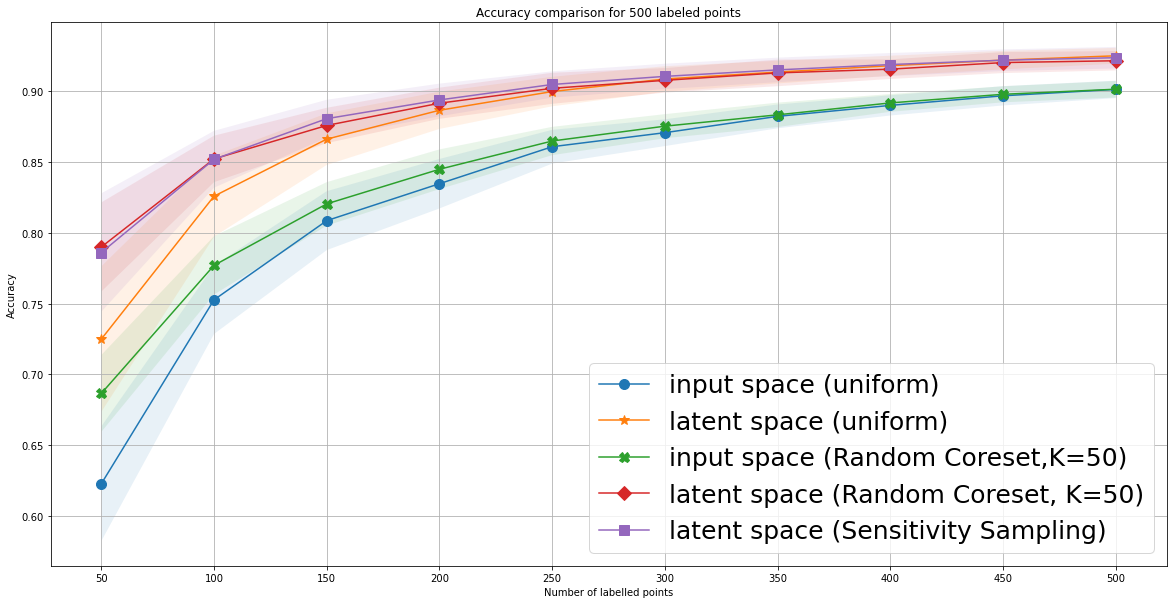

In [22]:
number_of_labeled_data = range(50,501,50)
plt.figure(figsize=(20,10))

plt.plot(number_of_labeled_data,uniform_is, marker='o', markersize=10)
plt.plot(number_of_labeled_data,uniform_ls, marker='*', markersize=10)
plt.plot(number_of_labeled_data,random_coreset_is50, marker='X', markersize=10)
plt.plot(number_of_labeled_data,random_coreset_ls50, marker='D', markersize=10) 
plt.plot(number_of_labeled_data,sensitivity_ls50, marker='s', markersize=10)


plt.fill_between(number_of_labeled_data, (uniform_is - uniform_is_sd), (uniform_is + uniform_is_sd), alpha=.1)
plt.fill_between(number_of_labeled_data, (uniform_ls - uniform_ls_sd), (uniform_ls + uniform_ls_sd), alpha=.1)
plt.fill_between(number_of_labeled_data, (random_coreset_is50 - random_coreset_is50_sd), (random_coreset_is50 + random_coreset_is50_sd), alpha=.1)
plt.fill_between(number_of_labeled_data, (random_coreset_ls50 - random_coreset_ls50_sd), (random_coreset_ls50 + random_coreset_ls50_sd), alpha=.1)
plt.fill_between(number_of_labeled_data, (sensitivity_ls50 - sensitivity_ls50_sd), (sensitivity_ls50 + sensitivity_ls50_sd), alpha=.1)





plt.legend(['input space (uniform)',         
            'latent space (uniform)',
          'input space (Random Coreset,K=50)',
            'latent space (Random Coreset, K=50)'\
           ,'latent space (Sensitivity Sampling)'
           ], loc = 4, fontsize=25)
plt.grid()
plt.xticks(number_of_labeled_data)
plt.xlabel("Number of labelled points")
plt.ylabel("Accuracy")
plt.title("Accuracy comparison for 500 labeled points")

# UT

# Z=7

In [ ]:
n_components = np.arange(1, 81)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(latent_space_train) #z=7
          for n in n_components]
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(n_components, [m.bic(latent_space_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(latent_space_train) for m in models], label='AIC')
plt.legend(loc='best')

plt.xlabel('n_components');

In [ ]:
np.argmin([m.bic(latent_space_train) for m in models])

In [ ]:
np.argmin([m.aic(latent_space_train) for m in models])

# GMM + UT

In [6]:
from filterpy.kalman import unscented_transform, MerweScaledSigmaPoints
import scipy.stats as stats

In [86]:
# gmm = GaussianMixture(n_components=20).fit(latent_space_train)
gmm = GaussianMixture(n_components=100).fit(latent_space_train)
labels = gmm.predict(latent_space_train)

In [87]:
print(Counter(labels))

Counter({15: 1450, 7: 1296, 42: 1294, 90: 1259, 45: 1167, 63: 1162, 6: 1146, 11: 976, 78: 974, 99: 930, 30: 915, 65: 907, 52: 902, 28: 892, 16: 854, 77: 822, 40: 811, 53: 803, 55: 803, 71: 781, 14: 778, 59: 776, 36: 768, 79: 743, 58: 708, 73: 707, 26: 703, 32: 698, 33: 695, 75: 680, 27: 674, 50: 671, 56: 670, 2: 665, 37: 663, 62: 653, 54: 639, 13: 628, 39: 624, 31: 601, 0: 601, 8: 598, 23: 596, 9: 593, 91: 586, 1: 584, 29: 584, 44: 580, 17: 579, 67: 564, 22: 544, 25: 541, 92: 539, 87: 536, 21: 525, 89: 512, 95: 510, 94: 509, 84: 507, 38: 504, 10: 502, 24: 493, 88: 484, 72: 481, 51: 478, 12: 471, 43: 467, 18: 466, 82: 464, 66: 460, 93: 460, 48: 459, 98: 445, 96: 443, 74: 432, 64: 431, 19: 430, 3: 420, 80: 415, 34: 408, 85: 397, 47: 380, 83: 379, 68: 378, 69: 357, 46: 354, 35: 343, 41: 333, 97: 332, 86: 331, 20: 318, 5: 310, 76: 303, 81: 238, 4: 230, 49: 215, 61: 200, 70: 197, 60: 169, 57: 147})


In [88]:
gmm.covariances_.shape

(100, 7, 7)

In [89]:
gmm.means_.shape

(100, 7)

In [90]:
all_sigmas = []
for i in range(100):#range(20):
    mean = gmm.means_[i]
    p = gmm.covariances_[i]
    points = MerweScaledSigmaPoints(n=7, alpha=0.1, beta=2., kappa=(3-7))
    sigmas = points.sigma_points(mean, p)
    all_sigmas.append(sigmas)
    #print(sigmas)

In [91]:
points

MerweScaledSigmaPoints object
n = 7
alpha = 0.1
beta = 2.0
kappa = -4
Wm = [-232.33333333   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667   16.66666667]
Wc = [-229.34333333   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667   16.66666667
        16.66666667   16.66666667   16.66666667   16.66666667   16.66666667]
subtract = <ufunc 'subtract'>
sqrt = <function cholesky at 0x2aaaf5aa6670>

In [92]:
all_sigmas = np.array(all_sigmas, dtype=np.float32)
all_sigmas.shape

(100, 15, 7)

In [93]:
sigma_points = all_sigmas.reshape(100*15,7)
sigma_points.shape

(1500, 7)

In [94]:
# REMOVE DUPLICATE SIGMA POINTS
sigma_points = np.unique(sigma_points, axis=0)
sigma_points.shape

(1500, 7)

In [95]:
# fig = go.Figure()

# fig.add_trace(go.Scatter3d(x=sigma_points[:,0], y=sigma_points[:,1], \
#                                    z=sigma_points[:,2], mode='markers',\
#                                   marker=dict(
#         size=2,
#         color='black',                # set color to an array/list of desired values
#        # colorscale='Viridis',   # choose a colorscale
#         opacity=1.0
#     )))

# fig.add_trace(go.Scatter3d(x=latent_space_train[:,0], y=latent_space_train[:,1], z=latent_space_train[:,2], mode='markers',\
#                                   marker=dict(
#         size=1,
#         color='yellow',#kmeans.labels_,                # set color to an array/list of desired values
#        # colorscale='Viridis',   # choose a colorscale
#         opacity=0.5
#     )))


# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=1000)

# fig.show()

In [96]:
# def closest_node(node, nodes):
#     dist_2 = np.sum((nodes - node)**2, axis=1)
#     return np.argmin(dist_2)

## Find class of sigma point
In order to find the class of sigma points we use KNN with Squared Euclidean Distance.

In [97]:
neigh = KNeighborsClassifier(n_neighbors=1,weights='distance')
neigh.fit(latent_space_train, Y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [98]:
prediction = neigh.predict(sigma_points)

In [99]:
print(Counter(prediction))

Counter({2: 165, 1: 165, 6: 165, 7: 164, 3: 150, 0: 150, 5: 150, 4: 148, 9: 138, 8: 105})


In [151]:
kmeans = KMeans(n_clusters=50, random_state=0).fit(sigma_points)
labels = kmeans.labels_

In [152]:
print(Counter(labels))

Counter({1: 112, 3: 99, 41: 91, 23: 91, 16: 90, 13: 89, 29: 87, 19: 86, 27: 84, 9: 79, 7: 78, 5: 78, 21: 74, 4: 72, 17: 70, 8: 68, 2: 67, 37: 66, 32: 64, 34: 62, 24: 62, 42: 62, 48: 62, 14: 62, 25: 61, 43: 60, 39: 60, 12: 57, 18: 50, 49: 50, 45: 48, 38: 47, 33: 46, 44: 45, 28: 45, 22: 45, 0: 44, 6: 44, 20: 44, 11: 42, 36: 41, 47: 41, 26: 39, 10: 38, 31: 37, 46: 36, 40: 36, 15: 33, 30: 31, 35: 25})


# train a model to check

In [153]:
mean_random = []
sd_random = []

for coreset_size in range(50,501,50): # start from 1000 labeled points
    print("*********************** Training on {} points ***********************".format(coreset_size))

    accuracy = []
    m = int(coreset_size/50) # m=B/K, number of points from each cluster
    iterations = 0
    while iterations < 500: # run 100 simulations and take average 
        train_data = []
        train_labels = []
        indices_to_pick = []
        
        print("Choosing {} points from each cluster".format(m))
        for cluster_index in range(50):
            C_i = np.where(labels == cluster_index)[0].tolist()
            sample_i = random.sample(C_i, m)
            indices_to_pick.append(sample_i)
        
        indices_to_pick = list(chain.from_iterable(indices_to_pick)) # flatten the 2D list
        
        assert len(indices_to_pick)==coreset_size, "Sample size mismatch!!!!"
        
        for index in indices_to_pick:
            train_data.append(sigma_points[index])
            train_labels.append(prediction[index]) 
        
        train_x = np.array(train_data)
        train_y = np.array(train_labels)
        
        print()
        print("Distribution of data in the training points")
        print(Counter(train_y))

        clf.fit(train_x, train_y)
        print("Best parameters set found on {} data points:".format(coreset_size))
        print(clf.best_params_)
        print()
        y_true, y_pred = Y_test, clf.predict(latent_space_test)
        accuracy.append(accuracy_score(y_true, y_pred))
        iterations += 1

    accuracy = np.asarray(accuracy)
    mean_accuracy = accuracy.mean()
    sd_accuracy = accuracy.std()


    mean_random.append(mean_accuracy)
    sd_random.append(sd_accuracy)
    
mean_random = np.array(mean_random)
sd_random = np.array(sd_random)

*********************** Training on 50 points ***********************
Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   26.6s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   26.6s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 9: 6, 7: 6, 0: 5, 1: 5, 6: 5, 4: 4, 5: 4, 3: 4, 8: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 5: 4, 8: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 4: 6, 7: 6, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 1: 5, 6: 5, 4: 4, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the tra

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 6: 6, 4: 5, 1: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 4: 6, 7: 6, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 6: 5, 3: 5, 4: 4, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the tr

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 2: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 7: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 2: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 7: 6, 1: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 7: 6, 1: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({4: 7, 2: 7, 7: 7, 0: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 5: 3, 

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 2: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({4: 7, 2: 7, 0: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3,

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 9: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 5, 4: 5, 1: 5, 6: 5, 5: 4, 3: 4, 8: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 6: 6, 4: 5, 1: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 6: 6, 1: 5, 7: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 8: 5, 1: 5, 6: 5, 9: 4, 3: 4, 5: 1})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 8: 5, 4: 5, 1: 5, 6: 5, 3: 4, 9: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 5, 1: 5, 9: 5, 7: 5, 6: 5, 3: 5, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 5: 4, 4: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40


Distribution of data in the training points
Counter({2: 8, 7: 7, 4: 6, 0: 5, 1: 5, 6: 5, 3: 5, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 c

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 4: 5, 1: 5, 6: 5, 3: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 4: 6, 7: 6, 0: 5, 1: 5, 6: 5, 5: 5, 9: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5:

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 9: 7, 0: 5, 1: 5, 7: 5, 6: 5, 3: 5, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 9: 7, 0: 6, 4: 5, 1: 5, 7: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the trai

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 3: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 8: 4, 9: 4, 5: 1})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 5, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 4: 5, 1: 5, 9: 5, 7: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5:

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 6: 6, 4: 5, 1: 5, 9: 5, 8: 3, 5: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 8: 5, 4: 5, 1: 5, 6: 5, 5: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 1: 6, 4: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 7: 6, 1: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 1: 6, 9: 6, 7: 6, 6: 5, 4: 4, 3: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 4: 6, 0: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 4: 5, 1: 5, 9: 5, 7: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 1: 5, 6: 5, 4: 4, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 9: 6, 4: 5, 1: 5, 7: 5, 6: 5, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 8: 4, 4: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 6, 4: 5, 6: 5, 9: 4, 3: 4, 5: 3, 8:

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 8: 5, 4: 5, 1: 5, 6: 5, 3: 4, 5: 3, 9: 1})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 9, 2: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 3, 9: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({4: 7, 2: 7, 7: 7, 0: 6, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 5: 4, 8: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the tr

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 8: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the t

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 5, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 8: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 3: 4, 9: 2, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 6, 4: 5, 6: 5, 9: 4, 3: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 7: 6, 1: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 4, 3: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 6, 0: 5, 4: 5, 1: 5, 9: 5, 6: 5, 3: 5, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 3: 4, 8: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 8: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.4s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 9: 5, 1: 5, 6: 5, 8: 4, 4: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 9: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 5: 4, 8: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 0: 6, 4: 5, 1: 5, 9: 5, 7: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 1: 5, 6: 5, 9: 4, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the train

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyB

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 9: 4, 5: 4, 3: 4, 8: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3}

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40


Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 5: 4, 8: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 6: 5, 8: 4, 4: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 6: 6, 4: 5, 1: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 9, 0: 7, 2: 7, 4: 5, 1: 5, 6: 5, 5: 4, 8: 3, 3: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 5, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 3: 4, 8: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 5: 4, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 5: 4, 8: 3, 9: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3,

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3,

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 4: 5, 1: 5, 7: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 9: 5, 1: 5, 6: 5, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 5: 4, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 5, 4: 5, 1: 5, 6: 5, 3: 5, 8: 4, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 5, 1: 5, 9: 5, 6: 5, 8: 4, 4: 4, 5: 4, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 7: 7, 0: 6, 1: 5, 6: 5, 9: 4, 3: 4, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 5: 3, 8

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 9: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 5, 1: 5, 6: 5, 3: 5, 4: 4, 9: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 0: 6, 9: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 9, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 9: 3, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3,

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 2: 7, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 6: 6, 4: 5, 1: 5, 9: 5, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 3: 5, 8: 4, 9: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the traini

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 8: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trainin

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 9, 2: 8, 0: 6, 6: 6, 4: 5, 1: 5, 8: 3, 5: 3, 3: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 5, 8: 3, 5: 3, 9: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({0: 7, 2: 7, 7: 7, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 4: 5, 1: 5, 7: 5, 6: 5, 8: 4, 3: 4, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 5, 1: 5, 9: 5, 7: 5, 6: 5, 3: 5, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 8: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 6, 0: 5, 4: 5, 1: 5, 9: 5, 6: 5, 5: 4, 3: 4, 8: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 0: 7, 2: 7, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 9: 6, 1: 5, 7: 5, 6: 5, 3: 5, 4: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 6: 6, 4: 5, 1: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3,

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 6: 5, 8: 4, 9: 4, 3: 4, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 7, 7: 7, 0: 6, 4: 6, 1: 5, 6: 5, 5: 4, 9: 4, 8: 3, 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the train

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 4: 6, 0: 5, 1: 5, 6: 5, 5: 4, 3: 4, 8: 3, 9: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the trai

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 8: 4, 9: 4, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 4: 6, 7: 6, 1: 5, 6: 5, 8: 4, 3: 4, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 8: 5, 4: 5, 1: 5, 6: 5, 9: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 1: 5, 9: 5, 6: 5, 4: 4, 8: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks     

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({7: 8, 0: 7, 2: 7, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 6: 6, 4: 5, 1: 5, 8: 3, 9: 3, 5: 3, 3: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 6: 6, 4: 5, 1: 5, 9: 4, 3: 4, 8: 3, 5: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5:

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 5: 3, 8: 2})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 0: 6, 7: 6, 4: 5, 1: 5, 9: 5, 6: 5, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 8, 0: 6, 4: 5, 1: 5, 6: 5, 3: 4, 8: 3, 9: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the tr

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 1 points from each cluster

Distribution of data in the training points
Counter({2: 8, 7: 7, 0: 6, 4: 5, 1: 5, 6: 5, 9: 4, 3: 4, 8: 3, 5: 3})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 1 points from each cluster

Distribution of data in the traini

/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(

Best parameters set found on 50 data points:
{'C': 10, 'kernel': 'rbf'}

*********************** Training on 100 points ***********************
Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 12, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 9, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 12, 0: 11, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 12, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 8: 8, 3: 8, 9: 5, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 5: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 11, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 5: 7, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({7: 16, 2: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 4: 11, 7: 11, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 9: 9, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 5: 8, 8: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 11, 4: 11, 6: 10, 3: 8, 9: 7, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 4: 11, 7: 11, 6: 11, 1: 10, 9: 10, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({7: 16, 2: 15, 0: 12, 1: 10, 6: 10, 4: 9, 3: 9, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 8: 8, 3: 8, 5: 4})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
/home/dsarkar/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(

Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 8: 9, 9: 9, 3: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 9: 10, 1: 10, 6: 10, 4: 9, 3: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 3: 9, 4: 8, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 8: 8, 9: 8, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 9, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 11, 1: 10, 6: 10, 3: 10, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 6: 11, 4: 10, 1: 10, 9: 9, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 9: 11, 1: 10, 6: 10, 4: 8, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 1: 11, 6: 10, 4: 9, 9: 9, 5: 8, 3: 7, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 12, 7: 12, 4: 11, 1: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 11, 4: 10, 1: 10, 6: 10, 8: 8, 3: 8, 9: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 11, 4: 11, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 4: 12, 7: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 6: 11, 1: 10, 9: 7, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 5: 7, 3: 7, 8: 6, 9: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 9: 7, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 4: 12, 7: 12, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 1: 11, 4: 10, 6: 10, 9: 9, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 11, 1: 10

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 11, 4: 10, 1: 10, 6: 10, 3: 8, 5: 7, 8: 6, 9: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({7: 16, 2: 15, 0: 12, 4: 12, 1: 10, 6: 10, 8: 7, 3: 7, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 9, 9: 7, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 13, 7: 13, 4: 11, 1: 10, 6: 10, 3: 9, 9: 7, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 5: 7, 8: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 12, 4: 12, 7: 12, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 11, 1: 10, 6: 10, 9: 8, 8: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 3: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 11, 4: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 12, 9: 12, 7: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 8: 7, 5: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 9, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 6: 11, 4: 10, 1: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10,

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 13, 4: 10, 1: 10, 6: 10, 8: 8, 9: 8, 3: 8, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 6: 11, 1: 10, 4: 9, 9: 9, 8: 6, 5: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 3: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 8, 9: 8, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 11, 1: 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 9: 10, 1: 10, 6: 10, 4: 9, 5: 7, 3: 7, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 10, 1: 10, 9: 10, 6: 10, 8: 8, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 8: 7, 5: 7, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 8, 3: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 6: 11, 1: 10, 9: 8, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 5: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 12, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1:

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 11, 4: 11, 6: 11, 1: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 14, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 9, 8: 8, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 14, 0: 13, 7: 13, 4: 11, 1: 10, 6: 10, 8: 8, 9: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({7: 16, 2: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 4: 12, 0: 11, 1: 10, 6: 10, 3: 9, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 18, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 12, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 8: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 5: 7, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 8, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 6: 11, 4: 10, 1: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 10, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 7, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 9: 9, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 13, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 11, 4: 11, 6: 11, 1: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 7, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 4: 13, 0: 12, 1: 10, 6: 10, 3: 8, 8: 6, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 8, 9: 8, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 9, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 5: 7, 3: 7, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 7, 5: 7, 8: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 9, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 13, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 8: 8, 3: 8, 9: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 6: 11, 4: 10, 1: 10, 9: 8, 8: 7, 5: 6, 3: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 5: 7, 3: 7, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 8: 8, 3: 8, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 11, 1: 10, 6: 10, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 14, 7: 14, 0: 13, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 9: 11, 1: 10, 6: 10, 4: 9, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 1: 10, 6: 10, 4: 9, 9: 9, 3: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 1: 11, 4: 11, 6: 10, 3: 8, 9: 6, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 11, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 13, 7: 13, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 9, 9: 7, 8: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 9: 12, 1: 10, 6: 10, 4: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 9, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 9: 11, 4: 10, 1: 10, 7: 10, 6: 10, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 9, 8: 6, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 9: 7, 5: 7, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 1: 11, 4: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 13, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 9: 9, 5: 8, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 12, 6: 11, 4: 10, 1: 10, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of d

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 5: 7, 3: 7, 8: 6, 9: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 0: 12, 7: 12, 4: 10, 1: 10, 6: 10, 9: 9, 8: 7, 5: 7, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 8: 7, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 9: 10, 1: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 6, 5: 6, 9: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 13, 4: 11, 6: 11, 1: 10, 9: 7, 5: 7, 8: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 8: 8, 3: 8, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 6: 11, 4: 10, 1: 10, 9: 7, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 1: 10, 6: 10, 4: 9, 3: 9, 9: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution o

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 9: 10, 1: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 11, 1: 10, 6: 10, 9: 7, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 14, 0: 13, 7: 13, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 8, 3: 8, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 14, 0: 13, 7: 13, 9: 11, 1: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 13, 7: 13, 4: 11, 1: 10, 6: 10, 9: 9, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 12, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 1: 10, 6: 10, 4: 9, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 18, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 5: 6, 8: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 11, 1: 10, 9: 10, 6: 10, 4: 9, 5: 8, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 12, 0: 11, 4: 10, 1: 10, 6: 10, 3: 10, 9: 9, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 9: 10, 1: 10, 6: 10, 4: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 11, 4: 11, 6: 11, 1: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 8: 7, 9: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 4: 12, 0: 11, 1: 10, 6: 10, 3: 8, 8: 7, 9: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 4: 12, 0: 11, 1: 10, 6: 10, 3: 8, 9: 7, 5: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 16, 0: 12, 4: 10, 1: 10, 6: 10, 5: 8, 8: 6, 9: 6, 3: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 13, 0: 11, 4: 10, 1: 10, 9: 10, 6: 10, 8: 7, 5: 7, 3: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 9: 10, 4: 10, 1: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 8: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distr

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 8, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 4: 11, 1: 10, 6: 10, 3: 8, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 9: 7, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 15, 0: 12, 4: 10, 1: 10, 6: 10, 8: 7, 9: 7, 3: 7, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 11, 1: 10, 6: 10, 4: 9, 9: 8, 3: 8, 8: 7, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 1: 10, 6: 10, 4: 9, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 10, 1: 10, 6: 10, 9: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 0: 12, 7: 12, 4: 11, 1: 10, 9: 10, 6: 10, 5: 7, 3: 7, 8: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 8: 10, 4: 10, 1: 10, 6: 10, 9: 8, 3: 7, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 0: 12, 7: 12, 4: 10, 1: 10, 9: 10, 6: 10, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 15, 0: 12, 4: 12, 1: 10, 6: 10, 8: 8, 3: 7, 9: 6, 5: 5})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 17, 7: 13, 0: 11, 4: 10, 1: 10, 6: 10, 3: 9, 9: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 14, 0: 12, 6: 11, 4: 10, 1: 10, 9: 8, 3: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 15, 7: 14, 0: 12, 1: 10, 9: 10, 6: 10, 4: 9, 3: 8, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 2 points from each cluster

Distribution of data in the training points
Counter({2: 16, 7: 13, 0: 12, 4: 11, 1: 10, 6: 10, 3: 9, 9: 7, 8: 6, 5: 6})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 100 data points:
{'C': 1, 'kernel': 'rbf'}

*********************** Training on 150 points ***********************
Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 17, 6: 16, 1: 15, 9: 12, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 8: 10, 9: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 19, 7: 19, 4: 16, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 4: 15, 1: 15, 6: 15, 3: 13, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 19, 1: 15, 6: 15, 4: 14, 9: 14, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 17, 9: 16, 4: 16, 1: 15, 6: 15, 3: 12, 8: 10, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 6: 16, 1: 15, 4: 14, 9: 13, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distr

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 15, 1: 15, 9: 15, 6: 15, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 0: 19, 7: 19, 4: 16, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 9: 15, 1: 15, 6: 15, 4: 14, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 9: 16, 1: 15, 6: 15, 4: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 18, 1: 15, 6: 15, 8: 12, 3: 12, 9: 10, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 3: 13, 9: 12, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 19, 4: 15, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 5: 10, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 0: 18, 7: 18, 1: 16, 4: 16, 6: 15, 9: 14, 3: 11, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 1: 16, 4: 15, 6: 15, 9: 13, 3: 13, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 6: 16, 1: 15, 9: 12, 5: 10, 3: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 4: 15, 1: 15, 6: 15, 3: 13, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distri

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 1: 16, 4: 16, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 24, 0: 18, 4: 15, 1: 15, 6: 15, 8: 10, 5: 10, 3: 10, 9: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 13, 9: 12, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 24, 0: 18

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 17, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 4: 19, 7: 19, 0: 18, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 1: 16, 4: 15, 6: 15, 9: 13, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 17, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 8: 10, 9: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 19, 4: 16, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 8: 11, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 17, 4: 15, 1: 15, 6: 15, 8: 11, 3: 11, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 19, 4: 16, 1: 15, 6: 15, 3: 13, 9: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 13, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 6: 16, 4: 15, 1: 15, 9: 11, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 3: 13, 9: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 17, 4: 16, 1: 15, 9: 15, 6: 15, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 1: 15, 6: 15, 9: 13, 4: 13, 5: 10, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 16, 6: 15, 4: 14, 9: 14, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 10, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distrib

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 19, 7: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 8: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distri

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 17, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 19, 4: 16, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 27, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distrib

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 1: 15, 6: 15, 4: 14, 9: 12, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 9: 15, 6: 15, 4: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 17, 1: 15, 6: 15, 3: 12, 9: 10, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 6: 16, 4: 15, 1: 15, 9: 12, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 13, 8: 10, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 1: 15, 6: 15, 4: 13, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 19, 7: 19, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 8: 11, 3: 11, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 19, 4: 17, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 5: 11, 8: 10, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 8: 12, 9: 12, 3: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distri

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 19, 7: 17, 4: 16, 1: 15, 9: 15, 6: 15, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 1: 15, 6: 15, 4: 14, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 18, 4: 16, 1: 15, 6: 15, 9: 14, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 9: 14, 4: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 8, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 16, 1: 15, 6: 15, 3: 12, 8: 11, 9: 11, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 8: 10, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 18, 4: 15, 1: 15, 9: 15, 6: 15, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 0: 18, 7: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 18, 9: 15, 1: 15, 6: 15, 4: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 16, 1: 15, 6: 15, 3: 11, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 17, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distrib

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 3: 12, 8: 11, 9: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 3: 13, 9: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 6: 16, 1: 15, 9: 12, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 18, 7: 18, 9: 15, 4: 15, 1: 15, 6: 15, 3: 14, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 11, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 0: 18, 7: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 3: 12, 8: 11, 9: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 8: 12, 5: 9, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 8: 12, 3: 11, 9: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 17, 1: 15, 6: 15, 3: 11, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distr

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 19, 1: 16, 4: 16, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 6: 16, 1: 15, 3: 12, 9: 11, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 18, 7: 18, 4: 16, 1: 15, 6: 15, 9: 13, 8: 12, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 24, 0: 17, 4: 15, 1: 15, 6: 15, 3: 12, 5: 10, 8: 9, 9: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 9: 14, 4: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 17, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 24, 0: 17, 1: 15, 6: 15, 4: 14, 8: 11, 9: 10, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 22, 0: 19, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 6: 16, 1: 15, 4: 14, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 9: 12, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 4: 17, 1: 16, 6: 15, 3: 12, 9: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 11, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 20, 0: 18, 4: 15, 1: 15, 9: 15, 6: 15, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 17, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 1: 15, 6: 15, 4: 13, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 23, 0: 19, 1: 15, 6: 15, 4: 14, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 13, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 4: 15, 1: 15, 6: 15, 3: 14, 9: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 16, 6: 16, 1: 15, 9: 13, 3: 12, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 5: 11, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 6: 16, 4: 15, 1: 15, 9: 13, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 3: 13, 9: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 8: 12, 9: 12, 3: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 6: 16, 1: 15, 4: 14, 9: 13, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 17, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 6: 16, 4: 15, 1: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 5: 11, 3: 11, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 19, 7: 19, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 8: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 11, 5: 10, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 1: 16, 4: 16, 6: 15, 9: 13, 3: 13, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 9: 15, 4: 15, 1: 15, 6: 15, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 5: 11, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 5: 11, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 8: 9, 9: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 3: 13, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 17, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 0: 18, 7: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 14, 9: 11, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 5: 11, 8: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 11, 9: 10, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 17, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 8: 11, 3: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 8: 12, 9: 12, 3: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 13, 8: 9, 9: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 8: 11, 5: 10, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 1: 15, 6: 15, 9: 14, 4: 13, 5: 11, 3: 11, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 9: 15, 6: 15, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 8: 11, 9: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 5: 10, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 21, 0: 19, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 1: 15, 6: 15, 4: 13, 9: 13, 3: 12, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 6: 16, 4: 15, 1: 15, 9: 13, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Di

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 10, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 1: 15, 6: 15, 4: 14, 9: 13, 5: 11, 8: 9, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distri

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 11, 9: 10, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 18, 7: 17, 4: 16, 9: 16, 1: 15, 6: 15, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 3: 14, 9: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 1: 15, 6: 15, 4: 14, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 11, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 5: 11, 8: 10, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 0: 19, 7: 18, 4: 16, 1: 15, 9: 15, 6: 15, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 16, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 19, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 17, 4: 16, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 6: 16, 4: 15, 1: 15, 9: 11, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 8: 11, 3: 11, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 23, 0: 19, 1: 15, 6: 15, 4: 14, 9: 12, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 0: 19, 7: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 19, 0: 17, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 17, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 14, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 1: 15, 9: 15, 6: 15, 4: 14, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 0: 19, 7: 19, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 16, 1: 15, 6: 15, 8: 10, 9: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 16, 1: 15, 6: 15, 3: 11, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 19, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 8: 12, 3: 11, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 17, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 1: 16, 4: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 18, 4: 17, 1: 15, 6: 15, 3: 11, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 5: 10, 3: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 18, 4: 16, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 17, 1: 15, 6: 15, 3: 11, 8: 10, 9: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 10, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 23, 0: 19, 1: 15, 6: 15, 4: 14, 9: 11, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 1: 16, 4: 16, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 13, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 8: 11, 5: 10, 3: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 0: 18, 7: 18, 4: 15, 1: 15, 6: 15, 3: 14, 9: 13, 8: 10, 5: 7})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 16, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distrib

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 20, 0: 19, 4: 15, 1: 15, 6: 15, 3: 13, 9: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 24, 0: 18, 4: 15, 1: 15, 6: 15, 3: 11, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distr

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 1: 15, 6: 15, 4: 14, 9: 12, 3: 12, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 8: 11, 9: 11, 5: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 17, 4: 15, 1: 15, 6: 15, 9: 11, 3: 11, 8: 10, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 9: 11, 8: 10, 5: 10, 3: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 17, 4: 16, 1: 15, 6: 15, 9: 13, 3: 13, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 4: 16, 1: 15, 6: 15, 9: 13, 3: 11, 5: 10, 8: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 19, 0: 18, 6: 16, 4: 15, 1: 15, 9: 13, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 22, 7: 20, 0: 18, 4: 16, 6: 16, 1: 15, 9: 14, 8: 10, 3: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 23, 7: 22, 0: 19,

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 14, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 1: 15, 6: 15, 4: 14, 9: 14, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 12, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 6: 16, 4: 15, 1: 15, 9: 12, 3: 11, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 21, 0: 18, 4: 15, 1: 15, 6: 15, 9: 12, 3: 11, 8: 10, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 25, 7: 20, 0: 18, 4: 15, 1: 15, 6: 15, 9: 13, 3: 12, 5: 9, 8: 8})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 23, 0: 18, 4: 15, 1: 15, 6: 15, 3: 12, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 3 points from each cluster

Distribution of data in the training points
Counter({2: 24, 7: 22, 0: 18, 4: 15, 1: 15, 6: 15, 3: 13, 9: 10, 8: 9, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 150 data points:
{'C': 1, 'kernel': 'rbf'}

*********************** Training on 200 points ***********************
Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 23, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 0: 24, 7: 24, 9: 22, 1: 20, 6: 20, 4: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 23, 1: 20, 6: 20, 3: 16, 9: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 15, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 3: 17, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 6: 21, 4: 20, 1: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 23, 6: 21, 4: 20, 1: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 30, 0: 24, 1: 21, 4: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 8: 14, 9: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 8: 14, 3: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 3: 17, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 29, 0: 24, 4: 22, 1: 20, 6: 20, 3: 17, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 16, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 17, 8: 13, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 30, 0: 23, 4: 22, 1: 20, 6: 20, 3: 17, 9: 13, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 34, 7: 25, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 18, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 4: 20, 1: 20, 9: 20, 6: 20, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 34, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 23, 1: 21, 4: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 9: 20, 1: 20, 6: 20, 4: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 21, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 4: 20, 1: 20, 9: 20, 6: 20, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 0: 24, 7: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 21, 1: 20, 6: 20, 8: 14, 9: 14, 3: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 21, 1: 20, 6: 20, 9: 15, 8: 14, 3: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 1: 21, 4: 20, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 22, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 24, 4: 21, 1: 20, 6: 20, 3: 15, 8: 13, 9: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Dis

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 34, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 9: 20, 4: 20, 1: 20, 6: 20, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 24, 0: 23, 4: 20, 1: 20, 6: 20, 9: 19, 3: 18, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 2

[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | e

Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 6: 21, 1: 20, 9: 16, 3: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 6: 21, 4: 20, 1: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 1: 21, 6: 20, 4: 19, 9: 18, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Di

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 23, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 22, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 4: 23, 6: 21, 1: 20, 9: 18, 3: 14, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 21, 4: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 22, 1: 21, 4: 20, 6: 20, 9: 18, 3: 17, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 23, 4: 21, 1: 20, 6: 20, 3: 16, 8: 15, 9: 15, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 1: 21, 4: 21, 6: 20, 9: 17, 3: 15, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 6: 21, 4: 20, 1: 20, 9: 18, 3: 14, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 1: 20, 6: 20, 9: 19, 4: 19, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 6: 21, 1: 20, 4: 19, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 21, 1: 20, 6: 20, 3: 15, 9: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 22, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 23, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Dist

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 8: 14, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 30, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 14, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 22, 1: 20, 6: 20, 3: 16, 9: 15, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 17, 9: 15, 8: 14, 5: 9})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 0: 25, 7: 25, 4: 22, 1: 20, 6: 20, 9: 16, 8: 14, 3: 14, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 0: 24, 7: 24, 4: 22, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 23, 4: 20, 1: 20, 6: 20, 3: 15, 9: 14, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 3: 16, 9: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 5: 14, 3: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 23, 4: 22, 1: 20, 6: 20, 9: 15, 3: 15, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 14, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 15, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 1: 20, 6: 20, 4: 19, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 23, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 29, 0: 23, 4: 21, 1: 20, 6: 20, 3: 17, 9: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 18, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 1: 20, 6: 20, 4: 19, 9: 16, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 23, 4: 22, 1: 20, 6: 20, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 3: 17, 9: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 25, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 23, 4: 20, 1: 20, 6: 20, 3: 15, 5: 14, 9: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 23, 1: 20, 6: 20, 3: 15, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 32, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 8: 12, 9: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 9: 20, 4: 20, 1: 20, 6: 20, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 8: 14, 5: 14, 3: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 21, 1: 20, 6: 20, 3: 14, 8: 13, 9: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 1: 20, 9: 20, 6: 20, 4: 19, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 28, 0: 25, 6: 21, 1: 20, 4: 19, 9: 18, 3: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 18, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 29, 0: 25, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 23, 4: 21, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 25, 0: 24, 6: 21, 9: 20, 4: 20, 1: 20, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 1: 20, 6: 20, 4: 19, 9: 19, 3: 17, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Dis

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 1: 20, 6: 20, 4: 19, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 4 points from each clu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 6: 21, 1: 20, 9: 16, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 6: 21, 4: 20, 1: 20, 9: 18, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 21, 1: 20, 6: 20, 3: 15, 8: 13, 9: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 22, 6: 21, 1: 20, 3: 15, 9: 13, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 30, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 6: 21, 4: 20, 1: 20, 9: 18, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 8: 14, 3: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 22, 1: 20, 6: 20, 3: 15, 9: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Dist

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 1: 21, 4: 20, 6: 20, 9: 18, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 24, 4: 20, 1: 20, 6: 20, 9: 14, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 23, 1: 21, 4: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 8: 15, 3: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 22, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 23, 1: 20, 6: 20, 4: 19, 9: 17, 3: 17, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 15, 5: 14, 3: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 22, 4: 21, 1: 20, 6: 20, 3: 17, 9: 16, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 22, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 4: 21, 1: 20, 6: 20, 3: 15, 8: 14, 9: 14, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 15, 8: 14, 3: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 6: 21, 4: 20, 1: 20, 9: 17, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 28, 0: 25, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 19, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 25, 4: 2

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 3: 17, 9: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 0: 25, 7: 25, 4: 20, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 21, 1: 20, 6: 20, 3: 16, 8: 14, 9: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 23, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 23, 4: 20, 1: 20, 6: 20, 3: 18, 9: 17, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 21, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 24, 4: 20, 1: 20, 6: 20, 3: 15, 8: 14, 9: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 8: 13, 9: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 6: 21, 4: 20, 1: 20, 9: 16, 3: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 1: 20, 6: 20, 4: 19, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 15, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 1: 20, 6: 20, 4: 19, 9: 17, 3: 17, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 23, 1: 20, 6: 20, 9: 18, 4: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 15, 8: 13, 9: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 30, 0: 25, 4: 20, 1: 20, 6: 20, 9: 14, 5: 14, 3: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 6: 21, 4: 20, 1: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 1: 20, 6: 20, 4: 19, 9: 19, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 8: 13, 5: 13, 3: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 22, 1: 20, 6: 20, 3: 17, 9: 16, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 23, 1: 20, 6: 20, 3: 16, 9: 13, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 1: 21, 4: 21, 6: 20, 3: 16, 9: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 14, 5: 14, 3: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 23, 1: 20, 6: 20, 4: 19, 9: 17, 5: 16, 3: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 23, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 32, 0: 24, 4: 20, 1: 20, 6: 20, 3: 14, 8: 13, 9: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 1: 21, 4: 20, 6: 20, 3: 16, 9: 15, 5: 14, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 1: 21, 4: 21, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 17, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 15, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 22, 1: 21, 6: 20, 3: 16, 9: 14, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 23, 1: 21, 4: 20, 6: 20, 3: 16, 9: 13, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 6: 21, 4: 20, 1: 20, 9: 15, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 9: 20, 1: 20, 6: 20, 4: 19, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 24, 4: 20, 1: 20, 6: 20, 3: 15, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 1: 20, 6: 20, 4: 19, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 8: 14, 9: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 6: 21, 4: 20, 1: 20, 9: 14, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 22, 1: 20, 6: 20, 9: 15, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 1: 20, 6: 20, 4: 19, 9: 19, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 15, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 14, 3: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 23, 1: 21, 4: 20, 6: 20, 9: 16, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 22, 1: 20, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 25, 6: 21, 4: 20, 1: 20, 9: 17, 8: 15, 3: 15, 5: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 13})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 22, 1: 20, 6: 20, 9: 15, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 18, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 25, 1: 20, 6: 20, 4: 19, 9: 18, 5: 14, 3: 14, 8: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 19, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 6: 21, 4: 20, 1: 20, 9: 18, 3: 14, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 1: 20, 6: 20, 4: 19, 3: 18, 9: 17, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 21, 4: 20, 6: 20, 3: 17, 9: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 27, 0: 24, 4: 22, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 3: 17, 9: 16, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 15, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 21, 6: 21, 4: 20, 9: 18, 5: 14, 3: 13, 8: 10})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 1: 21, 4: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 6: 21, 4: 20, 1: 20, 9: 16, 3: 15, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 19, 3: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 22, 1: 21, 6: 20, 9: 15, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 23, 4: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 18, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 21, 6: 21, 1: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 15, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 2

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s rem

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 17, 9: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 22, 1: 20, 6: 20, 3: 15, 9: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 4: 20, 1: 20, 6: 20, 9: 15, 8: 14, 5: 14, 3: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 1: 20, 6: 20, 4: 19, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 6: 21, 4: 20, 1: 20, 9: 16, 8: 13, 5: 13, 3: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 0: 24, 7: 24, 9: 21, 4: 20, 1: 20, 6: 20, 3: 16, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 22, 1: 20, 6: 20, 9: 16, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 29, 0: 24, 4: 22, 6: 21, 1: 20, 5: 14, 8: 13, 3: 13, 9: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 30, 7: 29, 0: 25, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 6: 21, 1: 20, 4: 19, 9: 18, 3: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 3: 18, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 24, 6: 21, 1: 20, 9: 19, 4: 18, 3: 14, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 30, 0: 24, 4: 20, 1: 20, 6: 20, 8: 14, 9: 14, 3: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 22, 1: 20, 6: 20, 3: 15, 9: 14, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 21, 1: 20, 6: 20, 3: 17, 9: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 25, 0: 24, 4: 20, 1: 20, 6: 20, 9: 18, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 8: 14, 3: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 34, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 12, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 29, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 8: 14, 3: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 29, 0: 23, 4: 20, 1: 20, 6: 20, 3: 16, 9: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 8: 13, 5: 13, 3: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 1: 20, 6: 20, 4: 19, 3: 17, 9: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 25, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 15, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 3: 17, 9: 16, 8: 12, 5: 12})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 16, 8: 14, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 25, 1: 20, 6: 20, 4: 18, 3: 16, 8: 15, 9: 15, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 23, 1: 20, 9: 20, 6: 20, 4: 18, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 6: 21, 4: 20, 1: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 21, 1: 20, 6: 20, 3: 16, 9: 15, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 0: 24, 7: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 18, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 15, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 31, 0: 24, 1: 20, 6: 20, 4: 19, 3: 16, 9: 14, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 5: 13, 8: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 25, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 27, 0: 24, 1: 20, 6: 20, 4: 19, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 0: 24, 7: 24, 4: 22, 1: 20, 6: 20, 9: 17, 3: 15, 8: 14, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 16, 8: 13, 5: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 15, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 20, 1: 20, 6: 20, 9: 17, 3: 17, 5: 13, 8: 11})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 26, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 26, 0: 24, 4: 22, 1: 20, 6: 20, 9: 16, 3: 16, 8: 13, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 27, 0: 23, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 31, 7: 27, 0: 24, 4: 21, 1: 20, 6: 20, 9: 17, 3: 14, 8: 13, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 32, 7: 28, 0: 24, 4: 20, 1: 20, 6: 20, 9: 16, 3: 16, 8: 12, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 4 points from each cluster

Distribution of data in the training points
Counter({2: 33, 7: 26, 0: 23, 4: 22, 1: 20, 6: 20, 3: 16, 8: 14, 9: 14, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 200 data points:
{'C': 1, 'kernel': 'linear'}

*********************** Training on 250 points ***********************
Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 28, 4: 25, 1: 25, 6: 25, 3: 21, 9: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 26, 1: 25, 6: 25, 9: 21, 5: 18, 3: 18, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 3: 21, 9: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 20, 8: 15, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 9: 19, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 9: 18, 3: 18, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 4: 26, 1: 25, 6: 25, 9: 23, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 24, 3: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 33, 0: 30, 6: 26, 4: 25, 1: 25, 9: 24, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 29, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 18, 5: 17, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 1: 25, 6: 25, 4: 24, 9: 19, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 1: 25, 6: 25, 4: 24, 9: 21, 3: 21, 8: 17, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 17, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 38, 0: 30, 1: 26, 4: 26, 6: 25, 3: 19, 9: 17, 5: 15, 8: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 1: 26, 4: 26, 6: 25, 9: 22, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 25, 6: 25, 9: 21, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 8: 17, 5: 17, 3: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 6: 26, 4: 25, 1: 25, 9: 23, 5: 17, 3: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 27, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 27, 1: 25, 6: 25, 9: 23, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 18, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 26, 6: 25, 4: 24, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 28, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 0: 31, 7: 31, 4: 28, 1: 25, 6: 25, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 17, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 3: 19, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 9: 19, 3: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 29, 4: 26, 1: 25, 6: 25, 3: 20, 8: 16, 9: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 30, 0: 29, 1: 25, 9: 25, 6: 25, 4: 24, 3: 21, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 24, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 9: 19, 3: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 27, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 0: 31, 7: 31, 4: 26, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 3: 22, 9: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 31, 1: 25, 6: 25, 4: 24, 9: 20, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 28, 6: 26, 1: 25, 4: 24, 3: 20, 9: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 8: 17, 3: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 3: 21, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 29, 4: 25, 1: 25, 6: 25, 9: 24, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 6: 26, 1: 25, 4: 24, 9: 22, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 4: 26, 1: 25, 6: 25, 9: 22, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 3: 22, 9: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 1: 26, 4: 25, 6: 25, 3: 20, 9: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 0: 30, 7: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 19, 5: 17, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 21, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 14})


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 3: 21, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 31, 1: 25, 6: 25, 4: 24, 9: 20, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 18, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 1: 26, 4: 26, 6: 25, 3: 19, 9: 18, 5: 17, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 21, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 4: 25, 1: 25, 6: 25, 9: 23, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 38, 0: 29, 1: 25, 6: 25, 4: 24, 9: 19, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 17, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 6: 26, 4: 25, 1: 25, 9: 22, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 9: 19, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 26, 1: 25, 6: 25, 3: 21, 9: 19, 8: 18, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 30, 0: 28, 4: 25, 1: 25, 6: 25, 9: 24, 3: 20, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 3: 21, 9: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 1: 25, 6: 25, 9: 23, 4: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 31, 4: 25, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 28, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 8: 18, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 38, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 28, 1: 25, 6: 25, 3: 20, 9: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 31, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 27, 1: 25, 6: 25, 9: 19, 3: 18, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 6: 26, 1: 25, 9: 20, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 18, 8: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 0: 29, 7: 29, 4: 27, 1: 25, 6: 25, 9: 23, 3: 21, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 28, 4: 27, 1: 25, 6: 25, 3: 20, 9: 17, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 6: 26, 4: 25, 1: 25, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 26, 6: 26, 1: 25, 9: 23, 3: 18, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 29, 6: 26, 4: 25, 1: 25, 3: 21, 9: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 42, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 29, 4: 26, 1: 25, 6: 25, 9: 18, 3: 18, 5: 17, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 3: 22, 9: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 38, 0: 31, 4: 25, 1: 25, 6: 25, 3: 20, 9: 17, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 31, 0: 30, 4: 26, 6: 26, 1: 25, 9: 22, 3: 21, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 18, 5: 18, 8: 17, 3: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 28, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 1: 25, 6: 25, 4: 24, 3: 20, 9: 18, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 6: 26, 4: 25, 1: 25, 9: 21, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 23, 9: 22, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 38, 0: 30, 1: 25, 6: 25, 4: 24, 9: 19, 3: 19, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 3: 22, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 8: 17, 3: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 24, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 5: 18, 3: 17, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 26, 6: 25, 9: 20, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 28, 1: 25, 6: 25, 4: 24, 9: 22, 3: 21, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 18, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 25, 6: 25, 9: 21, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 38, 0: 29, 4: 27, 1: 25, 6: 25, 3: 21, 8: 15, 9: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 37, 0: 29, 6: 26, 4: 25, 1: 25, 9: 19, 8: 17, 3: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s



Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 6: 26, 1: 25, 4: 24, 9: 20, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 29, 4: 26, 1: 25, 6: 25, 9: 23, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 27, 1: 26, 6: 25, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 30, 4: 26, 6: 26, 1: 25, 9: 22, 3: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 0: 30, 7: 30, 4: 27, 1: 25, 6: 25, 9: 23, 3: 20, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 27, 1: 25, 6: 25, 3: 19, 8: 17, 9: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 1: 26, 4: 25, 6: 25, 9: 22, 3: 19, 5: 15, 8: 14})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 6: 26, 4: 25, 1: 25, 9: 22, 3: 20, 8: 15, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 26, 6: 25, 4: 23, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 19, 3: 18, 8: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 31, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 18, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 3: 21, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 19, 9: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 3: 21, 8: 17, 9: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 6: 26, 4: 25, 1: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 4: 25, 1: 25, 6: 25, 9: 19, 3: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 26, 6: 25, 4: 24, 9: 23, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 23, 9: 22, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 8: 17, 9: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 1: 25, 9: 25, 6: 25, 4: 24, 8: 17, 5: 17, 3: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 1: 26, 6: 25, 4: 24, 9: 22, 3: 19, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 25, 1: 25, 6: 25, 3: 21, 9: 20, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 19, 8: 18, 9: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 3: 21, 9: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 27, 1: 25, 6: 25, 3: 19, 9: 18, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 29, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 5: 16, 8: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 23, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 19, 9: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 26, 1: 25, 6: 25, 3: 22, 9: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 1: 26, 6: 25, 9: 24, 4: 23, 3: 21, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 26, 1: 25, 6: 25, 3: 19, 9: 18, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 23, 9: 22, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 8: 18, 3: 18, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 38, 0: 30, 1: 25, 6: 25, 4: 24, 9: 19, 3: 19, 8: 18, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 9: 18, 3: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 38, 0: 30, 4: 25, 1: 25, 6: 25, 3: 19, 9: 17, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 39, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 8: 16, 9: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Counter({2: 40, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 4: 26, 6: 26, 1: 25, 9: 20, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 42, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 25, 1: 25, 6: 25, 9: 23, 3: 21, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 35, 0: 31, 4: 27, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 37, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 26, 6: 25, 3: 21, 9: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 4: 25, 6: 25, 9: 22, 3: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 18, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 30, 4: 27, 1: 25, 6: 25, 3: 21, 8: 15, 9: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 17, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 21, 8: 15, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 3: 21, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 3: 21, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 6: 26, 1: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 3: 22, 9: 20, 8: 16, 5: 14})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 35, 0: 31, 1: 25, 6: 25, 4: 24, 3: 20, 8: 19, 9: 19, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 29, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 26, 1: 25, 6: 25, 9: 20, 3: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 37, 0: 30, 4: 26, 6: 26, 1: 25, 3: 18, 9: 17, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 38, 0: 30, 4: 25, 1: 25, 6: 25, 3: 19, 9: 17, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 18, 5: 17, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 3: 21, 9: 18, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 3: 21, 9: 20, 8: 17, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 3: 22, 9: 18, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 27, 1: 26, 6: 25, 3: 20, 9: 18, 8: 15, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 29, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 38, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 24, 8: 18, 3: 18, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 4: 25, 1: 25, 9: 25, 6: 25, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 23, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 8: 18, 5: 12})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 4: 25, 1: 25, 6: 25, 9: 23, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 29, 4: 26, 1: 25, 6: 25, 9: 20, 3: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 26, 6: 26, 4: 24, 9: 22, 3: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 38, 0: 30, 6: 26, 4: 25, 1: 25, 3: 20, 9: 17, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 27, 1: 25, 6: 25, 3: 20, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 26, 4: 26, 6: 25, 3: 20, 9: 19, 8: 15, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 18, 8: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 20, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 29, 1: 25, 6: 25, 4: 24, 3: 21, 9: 20, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 29, 1: 25, 6: 25, 4: 24, 8: 20, 9: 18, 3: 18, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 26, 6: 26, 1: 25, 9: 20, 3: 18, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 29, 1: 25, 6: 25, 4: 24, 9: 24, 3: 21, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 40, 7: 31, 0: 30, 4: 25, 1: 25, 6: 25, 9: 24, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 31, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 29, 1: 25, 9: 25, 6: 25, 4: 24, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 22, 9: 19, 8: 14, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 5: 17, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 29, 4: 25, 1: 25, 6: 25, 9: 19, 3: 19, 8: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 20, 9: 19, 8: 17, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 6: 26, 1: 25, 9: 19, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 19, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 29, 4: 25, 1: 25, 6: 25, 9: 22, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 27, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 31, 1: 26, 4: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 28, 1: 25, 6: 25, 9: 18, 3: 18, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 29, 4: 26, 1: 25, 6: 25, 9: 22, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 6: 26, 4: 25, 1: 25, 9: 21, 3: 19, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 31, 1: 26, 6: 25, 4: 24, 9: 20, 3: 20, 8: 14, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 35, 0: 30, 6: 26, 1: 25, 4: 23, 9: 21, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 21, 9: 17, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 27, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 31, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 1: 25, 6: 25, 4: 24, 3: 21, 9: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 4: 25, 1: 25, 6: 25, 9: 19, 3: 18, 8: 17, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 37, 0: 31, 4: 26, 1: 25, 6: 25, 3: 18, 9: 17, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 37, 0: 29, 1: 25, 6: 25, 4: 24, 3: 21, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 26, 6: 26, 1: 25, 9: 22, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 1: 25, 6: 25, 4: 24, 9: 24, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 33, 0: 30, 6: 26, 4: 25, 1: 25, 9: 21, 3: 19, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 20, 3: 20, 8: 18, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 21, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 26, 1: 25, 6: 25, 3: 19, 9: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 16, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 31, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 19, 8: 15, 5: 15})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 32, 0: 30, 9: 25, 1: 25, 6: 25, 4: 24, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 35, 0: 30, 4: 27, 1: 25, 6: 25, 9: 19, 3: 19, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 38, 7: 35, 0: 31, 4: 26, 1: 25, 6: 25, 9: 21, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 30, 1: 25, 6: 25, 4: 24, 9: 21, 3: 20, 8: 16, 5: 15})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 21, 3: 20, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 29, 1: 26, 4: 26, 6: 25, 9: 22, 3: 21, 5: 15, 8: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 3: 18, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 3: 19, 9: 18, 8: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 36, 0: 31, 1: 25, 6: 25, 4: 24, 9: 21, 3: 18, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 23, 3: 18, 5: 17, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 35, 0: 29, 4: 26, 1: 25, 6: 25, 9: 19, 3: 19, 8: 18, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 31, 4: 25, 1: 25, 6: 25, 9: 22, 3: 22, 8: 15, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 33, 0: 30, 1: 25, 6: 25, 4: 24, 9: 22, 3: 20, 8: 17, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 27, 1: 25, 6: 25, 9: 20, 3: 20, 8: 16, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 1: 25, 6: 25, 4: 24, 3: 20, 9: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 6: 26, 1: 25, 4: 23, 9: 22, 3: 19, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 30, 4: 26, 1: 25, 6: 25, 9: 21, 8: 17, 3: 17, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 4: 25, 1: 25, 6: 25, 9: 20, 8: 18, 3: 18, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 34, 0: 29, 4: 25, 1: 25, 6: 25, 9: 21, 3: 20, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 34, 0: 29, 1: 25, 6: 25, 4: 24, 9: 23, 3: 19, 8: 17, 5: 15})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 36, 0: 30, 1: 25, 6: 25, 4: 24, 9: 20, 3: 20, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 34, 0: 30, 4: 25, 1: 25, 6: 25, 3: 20, 9: 19, 5: 16, 8: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 40, 7: 32, 0: 30, 4: 25, 1: 25, 6: 25, 9: 22, 3: 21, 8: 16, 5: 14})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 41, 7: 32, 0: 29, 1: 25, 6: 25, 4: 24, 9: 22, 3: 22, 8: 15, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 5 points from each cluster

Distribution of data in the training points
Counter({2: 39, 7: 33, 0: 30, 4: 26, 1: 25, 6: 25, 9: 22, 3: 21, 8: 16, 5: 13})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 250 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


*********************** Training on 300 points ***********************
Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 1: 31, 6: 31, 4: 28, 9: 25, 3: 21, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 1: 31, 4: 30, 6: 30, 9: 24, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 6: 31, 1: 30, 4: 29, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 6: 31, 4: 30, 1: 30, 9: 25, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 31, 4: 30, 6: 30, 9: 25, 3: 23, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 35, 1: 30, 6: 30, 4: 29, 3: 23, 9: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 4: 31, 6: 31, 1: 30, 3: 23, 9: 21, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 46, 0: 36, 1: 30, 6: 30, 4: 29, 3: 25, 9: 21, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 33, 1: 30, 6: 30, 9: 22, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 28, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 25, 9: 23, 8: 21, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 22, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 37, 4: 30, 1: 30, 6: 30, 9: 27, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 1: 31, 4: 31, 6: 30, 9: 25, 3: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 22, 8: 21, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 3: 25, 9: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 9: 28, 4: 27, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 4: 31, 1: 30, 6: 30, 9: 25, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 6: 31, 4: 30, 1: 30, 9: 25, 3: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 35, 4: 30, 1: 30, 6: 30, 3: 24, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 32, 1: 30, 6: 30, 3: 25, 9: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 35, 1: 30, 6: 30, 4: 28, 3: 26, 9: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 1: 31, 4: 30, 6: 30, 9: 25, 3: 25, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 31, 6: 30, 4: 29, 9: 26, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 40, 0: 36, 1: 31, 4: 30, 6: 30, 9: 28, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 37, 1: 31, 6: 30, 4: 29, 9: 23, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 1: 31, 6: 30, 4: 29, 9: 28, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 35, 4: 30, 1: 30, 6: 30, 3: 25, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 21, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 31, 4: 30, 6: 30, 9: 27, 3: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 9: 22, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 36, 1: 31, 4: 30, 6: 30, 9: 24, 3: 22, 5: 19, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 35, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 5: 21, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 32, 1: 30, 6: 30, 9: 22, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 6: 31, 4: 30, 1: 30, 9: 25, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 40, 0: 37, 4: 30, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 21, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 4: 30, 1: 30, 6: 30, 9: 27, 3: 25, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 8: 21, 9: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 45, 7: 40, 0: 37, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 22, 8: 21, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 45, 0: 37, 1: 30, 6: 30, 4: 29, 3: 23, 9: 21, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 36, 6: 31, 4: 30, 1: 30, 9: 24, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 26, 3: 25, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 46, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 22, 5: 21, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 32, 1: 30, 6: 30, 3: 25, 9: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 34, 4: 32, 1: 30, 6: 30, 9: 27, 3: 25, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 29, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 32, 1: 31, 6: 30, 9: 25, 3: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 44, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 8: 19, 9: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 37, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 22, 9: 21, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 32, 1: 30, 6: 30, 9: 23, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 3: 25, 9: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 1: 30, 6: 30, 4: 29, 9: 24, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 45, 0: 37, 4: 31, 1: 30, 6: 30, 3: 22, 9: 21, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 24, 9: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 24, 3: 23, 8: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 35, 4: 32, 1: 30, 6: 30, 3: 23, 9: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 6: 31, 4: 30, 1: 30, 3: 24, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 6: 31, 4: 30, 1: 30, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 31, 4: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 1: 30, 6: 30, 4: 29, 3: 24, 9: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 45, 0: 34, 1: 30, 6: 30, 4: 29, 3: 25, 9: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 3: 26, 9: 25, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 9: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 34, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 21, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 1: 31, 4: 30, 6: 30, 9: 26, 3: 23, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 37, 4: 31, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 19})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 39, 0: 37, 1: 30, 6: 30, 9: 29, 4: 29, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 38, 0: 35, 4: 31, 6: 31, 1: 30, 9: 26, 3: 25, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 1: 30, 6: 30, 4: 29, 9: 27, 8: 21, 3: 21, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 35, 4: 31, 1: 30, 6: 30, 9: 26, 3: 25, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 6: 31, 1: 30, 4: 29, 9: 25, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 27, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 1: 30, 6: 30, 4: 29, 9: 28, 3: 23, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 36, 4: 31, 6: 31, 1: 30, 9: 23, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 45, 0: 36, 4: 30, 1: 30, 6: 30, 3: 24, 9: 21, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 34, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 27, 3: 23, 8: 22, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 28, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 39, 0: 37, 4: 31, 1: 30, 6: 30, 9: 27, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 36, 6: 31, 4: 30, 1: 30, 9: 23, 3: 23, 8: 19, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 35, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 37, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 27, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 35, 6: 31, 4: 30, 1: 30, 9: 23, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 1: 31, 4: 31, 6: 30, 3: 24, 9: 23, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 31, 6: 31, 1: 30, 9: 22, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 45, 0: 35, 4: 30, 1: 30, 6: 30, 3: 25, 9: 20, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 1: 31, 4: 31, 6: 30, 3: 23, 9: 21, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 32, 1: 30, 6: 30, 9: 23, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 1: 31, 4: 31, 6: 30, 3: 25, 9: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 23, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 3: 26, 9: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 9: 21, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 1: 31, 6: 30, 4: 29, 9: 27, 3: 22, 5: 20, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 21, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 40, 0: 37, 1: 30, 6: 30, 4: 29, 9: 28, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 22, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 19, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 27, 5: 21, 3: 21, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 4: 31, 1: 30, 6: 30, 9: 22, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 35, 1: 31, 6: 30, 4: 29, 9: 28, 3: 26, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 8: 21, 3: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 0: 36, 7: 36, 9: 32, 1: 30, 6: 30, 4: 28, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 47, 0: 37, 4: 30, 1: 30, 6: 30, 3: 23, 8: 19, 9: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 8: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s


Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 37, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 51, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 5: 20, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 6: 31, 1: 30, 9: 22, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 32, 1: 30, 6: 30, 3: 25, 9: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 31, 1: 30, 6: 30, 9: 23, 3: 21, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 1: 31, 4: 31, 6: 31, 9: 26, 3: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 20, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 32, 1: 31, 6: 30, 3: 24, 9: 23, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 37, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 21, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 6: 31, 4: 30, 1: 30, 9: 24, 3: 24, 8: 21, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 28, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 6: 31, 4: 30, 1: 30, 9: 26, 8: 22, 3: 21, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 44, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 1: 31, 4: 31, 6: 30, 9: 24, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 32, 1: 31, 6: 30, 9: 26, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 33, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 31, 6: 30, 4: 29, 9: 27, 3: 24, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 6: 31, 4: 30, 1: 30, 9: 25, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 20, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 31, 1: 30, 6: 30, 9: 24, 3: 21, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 3: 24, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 21, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 31, 6: 31, 1: 30, 9: 23, 3: 21, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 1: 31, 4: 31, 6: 30, 9: 23, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 34, 4: 32, 1: 30, 6: 30, 9: 24, 3: 23, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 25, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 5: 18, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 5: 19, 8: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 4: 32, 1: 30, 6: 30, 3: 24, 9: 21, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 1: 31, 4: 30, 6: 30, 9: 27, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 3: 26, 9: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 21, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 23, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 37, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 36, 1: 30, 6: 30, 4: 28, 9: 27, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 21, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 37, 6: 31, 4: 30, 1: 30, 9: 23, 3: 21, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 24, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 31, 4: 31, 6: 30, 3: 25, 9: 22, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 9: 24, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 33, 1: 30, 6: 30, 9: 23, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 32, 1: 30, 6: 30, 9: 22, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 38, 0: 36, 4: 32, 1: 30, 6: 30, 3: 26, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 35, 4: 31, 1: 30, 6: 30, 9: 22, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 22, 5: 18, 8: 17})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 9: 21, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 35, 1: 30, 6: 30, 4: 29, 9: 24, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 35, 4: 32, 1: 30, 6: 30, 3: 24, 8: 20, 9: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 28, 9: 28, 3: 25, 8: 20, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 6: 31, 4: 30, 1: 30, 3: 24, 9: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 37, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 35, 4: 31, 1: 30, 6: 30, 9: 27, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 1: 31, 4: 31, 6: 30, 9: 26, 3: 22, 5: 20, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 38, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 25, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 37, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 1: 31, 4: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 22, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 37, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 37, 0: 36, 4: 31, 1: 30, 6: 30, 9: 28, 3: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 9: 23, 3: 23, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 1: 31, 4: 30, 6: 30, 9: 25, 3: 25, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 35, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 22, 5: 15})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 8: 22, 9: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 32, 1: 30, 6: 30, 9: 24, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 45, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 8: 19, 9: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 6: 31, 4: 30, 1: 30, 9: 27, 3: 24, 8: 20, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 46, 0: 36, 4: 30, 1: 30, 6: 30, 3: 22, 8: 20, 9: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 1: 31, 6: 30, 4: 29, 9: 24, 3: 22, 8: 18, 5: 18})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 37, 6: 31, 4: 30, 1: 30, 9: 26, 3: 21, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 35, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 5: 19, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 9: 24, 8: 21, 3: 21, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 38, 0: 37, 6: 31, 4: 30, 1: 30, 9: 28, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 45, 0: 37, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 25, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 32, 1: 30, 6: 30, 3: 24, 9: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 33, 1: 30, 6: 30, 3: 23, 9: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 6: 31, 1: 30, 4: 29, 9: 26, 3: 21, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 1: 30, 6: 30, 4: 28, 9: 25, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 6: 31, 1: 30, 4: 29, 9: 24, 3: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 37, 4: 32, 1: 30, 6: 30, 9: 24, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 35, 4: 31, 6: 31, 1: 30, 9: 27, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 26, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 6: 31, 4: 30, 1: 30, 9: 25, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 35, 4: 32, 1: 30, 6: 30, 9: 25, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 34, 1: 30, 6: 30, 4: 29, 3: 25, 9: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 26, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 37, 6: 31, 1: 30, 4: 29, 9: 25, 3: 21, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 34, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 20, 5: 18})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 22, 3: 21, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 6 points from each cluster

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished




Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 30, 1: 30, 6: 30, 9: 22, 3: 22, 8: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 44, 0: 34, 4: 30, 1: 30, 6: 30, 3: 25, 9: 20, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 32, 1: 30, 6: 30, 9: 22, 3: 21, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 35, 4: 31, 1: 30, 6: 30, 9: 27, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 4: 33, 1: 30, 6: 30, 9: 23, 3: 22, 5: 21, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 27, 3: 21, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 28, 9: 27, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 0: 37, 7: 37, 4: 31, 1: 30, 6: 30, 9: 26, 8: 23, 3: 23, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 0: 36, 7: 36, 4: 30, 1: 30, 9: 30, 6: 30, 3: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 3: 23, 9: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 35, 4: 30, 1: 30, 6: 30, 9: 27, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 9: 25, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 37, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 42, 0: 37, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 42, 0: 36, 1: 31, 4: 31, 6: 30, 3: 25, 9: 22, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 37, 1: 30, 6: 30, 4: 29, 3: 25, 9: 23, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 4: 31, 1: 30, 6: 30, 3: 23, 9: 21, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 38, 0: 35, 4: 31, 1: 30, 6: 30, 9: 27, 3: 25, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 24, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 37, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 9: 23, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 31, 4: 30, 6: 30, 9: 25, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 37, 1: 30, 6: 30, 4: 29, 9: 26, 3: 24, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 1: 31, 4: 30, 6: 30, 9: 25, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 44, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 37, 1: 30, 6: 30, 4: 29, 9: 23, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 40, 0: 36, 4: 31, 6: 31, 1: 30, 9: 25, 3: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 21, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 25, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 36, 1: 30, 6: 30, 4: 29, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 0: 37, 7: 33, 4: 30, 1: 30, 6: 30, 9: 29, 3: 26, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 37, 4: 30, 1: 30, 6: 30, 9: 27, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 36, 4: 31, 1: 30, 6: 30, 3: 25, 9: 23, 8: 18, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 38, 0: 36, 4: 33, 1: 30, 6: 30, 9: 24, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 26, 8: 20, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 32, 1: 31, 6: 30, 9: 26, 3: 24, 8: 18, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 3: 25, 9: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 37, 4: 31, 1: 30, 6: 30, 3: 25, 9: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 24, 9: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 36, 1: 31, 4: 30, 6: 30, 9: 26, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 44, 0: 36, 1: 30, 6: 30, 4: 29, 3: 24, 9: 23, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 27, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 23, 8: 20, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 23, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 24, 3: 23, 8: 21, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 1: 30, 6: 30, 4: 29, 9: 25, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 23, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 37, 4: 30, 1: 30, 6: 30, 3: 25, 9: 21, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 45, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 9: 20, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 37, 4: 30, 1: 30, 6: 30, 9: 26, 3: 25, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 50, 7: 38, 0: 36, 4: 30, 1: 30, 6: 30, 9: 26, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 35, 4: 31, 1: 30, 6: 30, 9: 27, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 45, 7: 42, 0: 37, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 1: 30, 6: 30, 4: 29, 9: 25, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 22, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 31, 6: 31, 1: 30, 9: 25, 3: 24, 5: 18, 8: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 30, 1: 30, 6: 30, 9: 27, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 35, 4: 30, 1: 30, 6: 30, 9: 26, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 4: 31, 6: 31, 1: 30, 9: 23, 3: 22, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 37, 1: 30, 6: 30, 4: 29, 9: 25, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 32, 1: 31, 6: 30, 3: 24, 9: 21, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 1: 30, 6: 30, 9: 29, 4: 27, 3: 23, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 43, 0: 35, 4: 31, 1: 30, 6: 30, 9: 22, 3: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 41, 0: 36, 4: 32, 6: 31, 1: 30, 9: 24, 3: 23, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 40, 0: 36, 4: 32, 1: 30, 6: 30, 9: 24, 3: 24, 8: 18, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 42, 0: 35, 4: 31, 1: 30, 6: 30, 3: 23, 9: 22, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 31, 1: 30, 6: 30, 3: 24, 9: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 39, 0: 35, 1: 30, 6: 30, 4: 29, 9: 27, 3: 23, 8: 19, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.




Distribution of data in the training points
Counter({2: 49, 7: 43, 0: 35, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 5: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 46, 7: 42, 0: 37, 1: 31, 4: 31, 6: 30, 3: 24, 9: 23, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 3: 23, 9: 22, 8: 20, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 49, 7: 42, 0: 36, 4: 31, 1: 30, 6: 30, 3: 22, 9: 21, 8: 20, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 42, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 35, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 21, 5: 16})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 36, 1: 30, 6: 30, 4: 29, 9: 27, 3: 24, 8: 19, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 39, 0: 36, 4: 31, 1: 30, 6: 30, 9: 26, 3: 22, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 36, 4: 31, 1: 30, 6: 30, 9: 25, 3: 22, 5: 20, 8: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 1: 31, 6: 30, 4: 29, 9: 28, 3: 22, 8: 19, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 40, 0: 35, 4: 32, 1: 30, 6: 30, 9: 26, 3: 23, 5: 19, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 41, 0: 35, 1: 30, 6: 30, 4: 29, 9: 26, 5: 21, 3: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 41, 0: 36, 4: 30, 1: 30, 6: 30, 9: 25, 3: 24, 8: 18, 5: 18})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 48, 7: 39, 0: 36, 1: 31, 6: 30, 4: 29, 3: 27, 9: 26, 8: 17, 5: 17})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 6 points from each cluster

Distribution of data in the training points
Counter({2: 47, 7: 44, 0: 37, 1: 31, 6: 31, 4: 30, 9: 22, 5: 20, 3: 20, 8: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 300 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


*********************** Training on 350 points ***********************
Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 1: 35, 6: 35, 4: 34, 3: 29, 9: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 32, 3: 27, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 6: 36, 4: 35, 1: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 3: 28, 8: 26, 9: 25, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 41, 1: 36, 4: 35, 6: 35, 9: 31, 3: 30, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 3: 29, 9: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 43, 4: 38, 1: 35, 6: 35, 3: 27, 9: 24, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 30, 3: 28, 8: 24, 5: 18})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 36, 1: 35, 6: 35, 3: 28, 9: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 26, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 43, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 46, 0: 43, 4: 37, 1: 35, 6: 35, 9: 30, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 51, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 25, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 42, 4: 36, 6: 36, 1: 35, 3: 27, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 36, 4: 36, 6: 35, 3: 28, 9: 27, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 3: 30, 9: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 41, 1: 35, 6: 35, 4: 34, 9: 29, 3: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 40, 4: 36, 1: 35, 6: 35, 9: 31, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 43, 4: 36, 1: 35, 6: 35, 9: 30, 3: 28, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 37, 1: 36, 6: 35, 3: 29, 9: 25, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 37, 1: 35, 6: 35, 3: 28, 9: 25, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 3: 28, 9: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 6: 36, 4: 35, 1: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 43, 4: 38, 1: 36, 6: 35, 9: 27, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 25, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 43, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 6: 36, 1: 35, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 3: 29, 9: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 39, 6: 36, 1: 35, 3: 27, 9: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 43, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 50, 0: 43, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 43, 4: 35, 1: 35, 6: 35, 3: 29, 9: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 6: 36, 4: 35, 1: 35, 9: 29, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 41, 4: 37, 1: 35, 6: 35, 3: 29, 9: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 53, 0: 42, 1: 35, 6: 35, 4: 33, 3: 28, 9: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 51, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 1: 35, 6: 35, 4: 34, 9: 30, 3: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 26, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 43, 4: 35, 1: 35, 6: 35, 9: 29, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 3: 29, 9: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 41, 1: 36, 4: 36, 6: 35, 9: 29, 3: 27, 5: 23, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 44, 0: 43, 4: 35, 1: 35, 6: 35, 9: 31, 3: 29, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 26, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 24, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 52, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 40, 6: 36, 1: 35, 4: 33, 9: 30, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 53, 0: 42, 4: 35, 1: 35, 6: 35, 3: 28, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 37, 1: 35, 6: 35, 9: 30, 3: 25, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 3: 29, 9: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 43, 1: 35, 6: 35, 4: 34, 9: 30, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 43, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 36, 6: 36, 1: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 43, 6: 36, 1: 35, 4: 34, 9: 29, 3: 28, 8: 20, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 45, 0: 43, 4: 36, 1: 35, 6: 35, 9: 31, 3: 30, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 43, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 3: 29, 9: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 28, 3: 28, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 4: 37, 1: 36, 6: 35, 9: 29, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 9: 26, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 28, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 28, 5: 23, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 4: 35, 1: 35, 6: 35, 3: 29, 9: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 42, 4: 35, 1: 35, 6: 35, 3: 28, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 42, 4: 35, 1: 35, 6: 35, 3: 27, 9: 23, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 20, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 6: 36, 4: 35, 1: 35, 9: 28, 3: 25, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 30, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 43, 1: 36, 4: 35, 6: 35, 9: 29, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 30, 3: 29, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 4: 36, 1: 35, 6: 35, 9: 30, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 50, 0: 43, 4: 37, 6: 36, 1: 35, 3: 26, 9: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 42, 6: 36, 4: 35, 1: 35, 9: 29, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 1: 35, 6: 35, 4: 33, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 1: 35, 6: 35, 4: 34, 9: 32, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 6: 36, 4: 35, 1: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 27, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 35, 1: 35, 6: 35, 9: 31, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 4: 36, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 40, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 43, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 1: 35, 6: 35, 4: 34, 9: 29, 3: 29, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 43, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 25, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 1: 35, 6: 35, 4: 34, 9: 30, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 6: 36, 4: 35, 1: 35, 9: 29, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 41, 1: 36, 4: 35, 6: 35, 9: 31, 3: 28, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 40, 4: 36, 6: 36, 1: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 43, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 43, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 41, 4: 36, 1: 35, 6: 35, 9: 30, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 41, 1: 36, 4: 35, 6: 35, 9: 31, 3: 29, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 43, 4: 37, 1: 35, 6: 35, 9: 30, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 6: 36, 4: 35, 1: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 28, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 3: 30, 9: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 40, 4: 36, 1: 35, 6: 35, 9: 26, 3: 26, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 42, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 26, 8: 25, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 4: 35, 1: 35, 6: 35, 9: 31, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 1: 36, 4: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 43, 4: 36, 1: 35, 6: 35, 9: 27, 3: 25, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 44, 0: 42, 4: 36, 6: 36, 1: 35, 9: 32, 3: 26, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 6: 36, 1: 35, 4: 33, 9: 29, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s



Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 32, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 51, 0: 42, 6: 36, 4: 35, 1: 35, 9: 27, 3: 26, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 43, 1: 35, 6: 35, 4: 34, 9: 31, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 41, 1: 36, 4: 36, 6: 36, 9: 28, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 4: 37, 1: 35, 6: 35, 9: 27, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 40, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 44, 0: 42, 1: 35, 6: 35, 4: 34, 9: 34, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 50, 0: 42, 1: 36, 6: 35, 4: 34, 9: 27, 3: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 1: 36, 4: 36, 6: 35, 9: 30, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 1: 35, 6: 35, 4: 34, 3: 30, 9: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 42, 4: 37, 1: 35, 6: 35, 9: 32, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 26, 5: 24, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 44, 0: 43, 4: 36, 1: 35, 6: 35, 9: 30, 3: 29, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 25, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 43, 6: 36, 4: 35, 1: 35, 9: 29, 3: 26, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 30, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 43, 1: 35, 6: 35, 4: 34, 9: 28, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 44, 0: 42, 4: 36, 6: 36, 1: 35, 9: 32, 3: 26, 8: 25, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 29, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 42, 1: 35, 6: 35, 4: 34, 9: 27, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 43, 6: 36, 1: 35, 4: 34, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 41, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 52, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 9: 28, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 40, 1: 35, 6: 35, 4: 34, 9: 28, 3: 27, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 43, 4: 36, 6: 36, 1: 35, 9: 30, 3: 25, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 53, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 32, 3: 28, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 40, 6: 36, 4: 35, 1: 35, 9: 31, 3: 25, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 6: 36, 4: 35, 1: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 21, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 45, 0: 41, 4: 35, 1: 35, 6: 35, 9: 33, 3: 28, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 43, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 7 points from each cluster

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.




Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 42, 4: 38, 1: 35, 6: 35, 3: 29, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 43, 4: 36, 1: 35, 6: 35, 9: 29, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 53, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 30, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 3: 29, 9: 26, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 42, 1: 36, 6: 35, 4: 33, 9: 28, 3: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 6: 36, 4: 35, 1: 35, 3: 29, 9: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 41, 1: 35, 6: 35, 4: 34, 3: 28, 9: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 37, 1: 35, 6: 35, 3: 29, 9: 24, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 5: 24, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 40, 4: 36, 6: 36, 1: 35, 9: 29, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 37, 1: 35, 6: 35, 9: 27, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 1: 36, 4: 36, 6: 36, 9: 26, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 42, 1: 36, 6: 35, 4: 34, 9: 28, 3: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 36, 6: 36, 1: 35, 9: 29, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 30, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 40, 4: 35, 1: 35, 6: 35, 9: 30, 3: 29, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 43, 1: 36, 4: 35, 6: 35, 9: 26, 3: 26, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 42, 1: 36, 4: 35, 6: 35, 9: 26, 3: 25, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 40, 1: 36, 6: 35, 4: 33, 9: 29, 3: 29, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 6: 36, 4: 35, 1: 35, 9: 30, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 50, 0: 41, 1: 35, 6: 35, 4: 34, 9: 29, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 32, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 1: 36, 4: 36, 6: 35, 3: 29, 9: 27, 8: 21, 5: 21})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 45, 0: 42, 1: 35, 6: 35, 4: 34, 9: 30, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 38, 6: 36, 1: 35, 3: 27, 9: 25, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 3: 29, 9: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 32, 3: 26, 8: 24, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 50, 0: 42, 4: 36, 6: 36, 1: 35, 9: 26, 3: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 38, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 37, 1: 35, 6: 35, 3: 26, 8: 25, 9: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 41, 4: 37, 1: 35, 6: 35, 9: 29, 3: 29, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 37, 1: 36, 6: 35, 3: 27, 9: 25, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 1: 35, 6: 35, 4: 34, 9: 32, 3: 27, 5: 23, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 42, 4: 36, 1: 35, 6: 35, 3: 26, 9: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 40, 4: 35, 1: 35, 6: 35, 9: 32, 3: 27, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 33, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 29, 3: 26, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 43, 4: 36, 6: 36, 1: 35, 9: 28, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 41, 4: 36, 1: 35, 6: 35, 9: 32, 3: 29, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 43, 4: 36, 1: 35, 6: 35, 3: 29, 9: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 36, 1: 35, 6: 35, 9: 26, 3: 25, 8: 23, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 4: 35, 1: 35, 6: 35, 9: 31, 3: 25, 5: 24, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 9: 30, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 43, 4: 37, 1: 35, 6: 35, 9: 31, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 27, 3: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 6: 36, 4: 35, 1: 35, 9: 29, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 50, 0: 43, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 26, 8: 24, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 44, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 43, 4: 36, 6: 36, 1: 35, 9: 27, 3: 27, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 6: 36, 4: 35, 1: 35, 9: 27, 3: 25, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 41, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 6: 36, 1: 35, 4: 34, 9: 29, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 4: 35, 1: 35, 6: 35, 3: 29, 9: 28, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 42, 4: 38, 1: 35, 6: 35, 9: 29, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 26, 3: 26, 8: 25, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 43, 0: 42, 4: 36, 1: 35, 6: 35, 9: 34, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 28, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 30, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 41, 4: 38, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 26, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 6: 36, 4: 35, 1: 35, 9: 28, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 25, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 44, 0: 42, 1: 35, 6: 35, 4: 34, 9: 33, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 1: 36, 4: 36, 6: 36, 9: 30, 3: 26, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 41, 4: 35, 1: 35, 6: 35, 9: 33, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 40, 4: 36, 1: 35, 6: 35, 9: 29, 3: 29, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 40, 4: 36, 1: 35, 6: 35, 3: 30, 9: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 40, 4: 38, 1: 35, 6: 35, 9: 30, 3: 29, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 43, 4: 36, 1: 35, 6: 35, 9: 28, 3: 25, 8: 23, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 29, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 52, 0: 42, 4: 35, 1: 35, 6: 35, 9: 26, 3: 25, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 45, 0: 43, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 38, 1: 35, 6: 35, 9: 26, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 43, 4: 35, 1: 35, 6: 35, 9: 30, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 37, 1: 35, 6: 35, 3: 28, 9: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 43, 4: 37, 1: 35, 6: 35, 3: 27, 9: 26, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 53, 0: 42, 4: 36, 1: 35, 6: 35, 3: 26, 9: 24, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 1: 36, 6: 36, 4: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 41, 4: 36, 1: 35, 6: 35, 3: 28, 9: 25, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 41, 4: 36, 1: 35, 6: 35, 9: 32, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 41, 6: 36, 4: 35, 1: 35, 3: 27, 9: 25, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 1: 35, 6: 35, 4: 34, 9: 32, 3: 25, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 46, 0: 43, 1: 35, 6: 35, 4: 34, 9: 33, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 29, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 32, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 43, 1: 36, 6: 35, 4: 32, 9: 31, 3: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 43, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 1: 35, 6: 35, 4: 34, 9: 29, 3: 26, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 44, 0: 42, 4: 38, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 6: 36, 1: 35, 4: 34, 9: 31, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 36, 1: 35, 6: 35, 9: 26, 3: 26, 8: 25, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 41, 4: 38, 1: 35, 6: 35, 9: 29, 3: 25, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 6: 36, 4: 35, 1: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 51, 0: 42, 4: 37, 1: 35, 6: 35, 3: 29, 9: 24, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 40, 4: 36, 1: 35, 6: 35, 3: 27, 9: 26, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 50, 0: 42, 6: 36, 4: 35, 1: 35, 9: 26, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 37, 1: 35, 6: 35, 9: 27, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 42, 1: 36, 4: 35, 6: 35, 9: 32, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 29, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 41, 6: 36, 1: 35, 4: 33, 9: 33, 3: 26, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 40, 4: 37, 1: 35, 6: 35, 3: 30, 9: 27, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 40, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 41, 4: 36, 6: 36, 1: 35, 9: 27, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 25, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 37, 6: 36, 1: 35, 9: 29, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 6: 36, 4: 35, 1: 35, 9: 29, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 3: 30, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 40, 6: 36, 1: 35, 4: 32, 9: 31, 3: 28, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 26, 8: 25, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 42, 1: 35, 6: 35, 4: 34, 3: 27, 9: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 43, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 38, 1: 35, 6: 35, 9: 27, 3: 26, 8: 24, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 42, 6: 36, 4: 35, 1: 35, 9: 28, 3: 26, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 29, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 43, 1: 35, 6: 35, 4: 34, 9: 30, 3: 30, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 41, 4: 37, 1: 35, 6: 35, 9: 30, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 26, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 3: 28, 9: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 41, 4: 36, 6: 36, 1: 35, 3: 26, 9: 25, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 47, 0: 42, 4: 36, 1: 35, 6: 35, 3: 29, 9: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 43, 4: 36, 1: 35, 6: 35, 9: 27, 3: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 41, 4: 35, 1: 35, 6: 35, 9: 29, 3: 28, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 4: 36, 6: 36, 1: 35, 9: 27, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 53, 7: 45, 0: 43, 4: 36, 1: 35, 6: 35, 9: 33, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 4: 36, 1: 35, 6: 35, 9: 27, 3: 27, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 41, 4: 36, 1: 35, 6: 35, 3: 29, 9: 25, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 46, 0: 43, 4: 36, 1: 35, 6: 35, 9: 29, 3: 28, 8: 24, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 24, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 43, 4: 36, 1: 35, 6: 35, 3: 29, 9: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 43, 4: 35, 1: 35, 6: 35, 9: 26, 3: 26, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 52, 0: 41, 1: 35, 6: 35, 4: 34, 9: 27, 3: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 1: 35, 6: 35, 4: 33, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 5: 24, 8: 23, 3: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 1: 35, 6: 35, 4: 34, 9: 28, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 30, 3: 26, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 3: 29, 9: 27, 8: 22, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 30, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 42, 4: 36, 6: 36, 1: 35, 9: 28, 3: 25, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 1: 35, 6: 35, 4: 33, 9: 31, 3: 28, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 41, 1: 35, 6: 35, 4: 34, 9: 29, 3: 28, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 45, 0: 43, 4: 35, 1: 35, 6: 35, 9: 34, 3: 28, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 3: 29, 9: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 42, 1: 35, 6: 35, 4: 32, 9: 29, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 50, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 36, 1: 35, 6: 35, 9: 28, 3: 28, 8: 21, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 28, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 41, 4: 35, 1: 35, 6: 35, 3: 28, 9: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 46, 0: 42, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 43, 0: 42, 4: 36, 1: 35, 6: 35, 9: 33, 3: 25, 5: 24, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 41, 4: 36, 6: 36, 1: 35, 3: 27, 9: 26, 8: 23, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 37, 1: 35, 6: 35, 9: 29, 3: 26, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 51, 0: 43, 4: 35, 1: 35, 6: 35, 9: 27, 3: 26, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 54, 7: 47, 0: 43, 4: 36, 1: 35, 6: 35, 9: 29, 3: 29, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 48, 0: 41, 4: 36, 1: 35, 6: 35, 9: 26, 3: 26, 8: 25, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 1: 35, 6: 35, 4: 33, 9: 32, 3: 28, 8: 22, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 42, 4: 36, 1: 35, 6: 35, 9: 28, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 30, 3: 29, 5: 21, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 53, 0: 42, 4: 37, 6: 36, 1: 35, 3: 25, 9: 23, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 27, 8: 23, 5: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 1: 35, 6: 35, 4: 33, 9: 33, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 49, 0: 41, 1: 35, 6: 35, 4: 34, 9: 28, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 45, 0: 42, 1: 35, 6: 35, 4: 34, 9: 32, 3: 28, 5: 22, 8: 20})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 58, 7: 49, 0: 42, 4: 35, 1: 35, 6: 35, 9: 27, 3: 27, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 57, 7: 50, 0: 40, 4: 37, 1: 35, 6: 35, 3: 28, 9: 23, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 1: 35, 6: 35, 4: 34, 9: 31, 3: 28, 8: 23, 5: 19})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 48, 0: 42, 4: 38, 1: 35, 6: 35, 9: 27, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 41, 4: 36, 1: 35, 6: 35, 9: 29, 3: 27, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 47, 0: 43, 4: 35, 1: 35, 6: 35, 9: 30, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 50, 0: 42, 1: 36, 4: 35, 6: 35, 3: 27, 9: 26, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 100, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 48, 0: 42, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 46, 0: 42, 4: 36, 1: 35, 6: 35, 9: 29, 3: 27, 5: 23, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 49, 0: 43, 4: 36, 1: 35, 6: 35, 9: 26, 3: 26, 8: 23, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 55, 7: 51, 0: 43, 1: 35, 6: 35, 4: 33, 9: 28, 3: 28, 8: 21, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 45, 0: 42, 4: 36, 1: 35, 6: 35, 9: 31, 3: 27, 5: 22, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 44, 0: 42, 4: 35, 1: 35, 6: 35, 9: 31, 3: 29, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 7 points from each cluster

Distribution of data in the training points
Counter({2: 56, 7: 47, 0: 43, 4: 35, 1: 35, 6: 35, 9: 29, 3: 27, 8: 22, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 350 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


*********************** Training on 400 points ***********************
Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 9: 34, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 1: 40, 6: 40, 4: 39, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 1: 40, 6: 40, 4: 38, 9: 34, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 51, 0: 48, 4: 42, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 49, 1: 41, 4: 41, 6: 40, 9: 34, 3: 32, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 1: 40, 6: 40, 4: 38, 9: 35, 3: 33, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 6: 41, 1: 40, 4: 39, 9: 33, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 59, 0: 47, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 42, 1: 40, 6: 40, 3: 33, 9: 29, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 48, 4: 41, 6: 41, 1: 40, 9: 33, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 8: 28, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 1: 41, 4: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 4: 43, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 30, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 28, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 1: 40, 6: 40, 4: 39, 3: 32, 9: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 42, 6: 41, 1: 40, 9: 31, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 49, 1: 40, 6: 40, 4: 39, 9: 34, 3: 34, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 42, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 49, 4: 42, 1: 40, 6: 40, 3: 32, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 61, 7: 49, 0: 48, 4: 43, 6: 41, 1: 40, 9: 37, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 4: 42, 1: 40, 6: 40, 3: 33, 9: 30, 8: 27, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 48, 1: 41, 4: 40, 6: 40, 9: 31, 3: 31, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 4: 42, 1: 40, 6: 40, 9: 33, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 42, 1: 41, 6: 41, 9: 31, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 1: 40, 6: 40, 4: 39, 9: 35, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 33, 8: 25, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 43, 1: 40, 6: 40, 9: 32, 3: 31, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 52, 0: 47, 4: 41, 1: 40, 6: 40, 9: 37, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 1: 41, 4: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 51, 0: 48, 4: 41, 1: 40, 6: 40, 9: 37, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 1: 40, 6: 40, 4: 39, 9: 33, 3: 33, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 4: 41, 1: 40, 6: 40, 9: 35, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 6: 41, 4: 40, 1: 40, 9: 33, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 59, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 27, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 52, 0: 49, 4: 41, 1: 40, 6: 40, 9: 35, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 47, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 32, 3: 31, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 47, 4: 43, 1: 40, 6: 40, 9: 32, 3: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 4: 42, 1: 40, 6: 40, 9: 33, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 36, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 59, 0: 48, 4: 41, 1: 40, 6: 40, 3: 30, 9: 29, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 4: 42, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 49, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 48, 4: 41, 6: 41, 1: 40, 3: 32, 9: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 49, 4: 41, 1: 40, 6: 40, 9: 33, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 53, 0: 48, 6: 41, 1: 40, 4: 39, 9: 35, 3: 29, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 3: 33, 9: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 30, 8: 29, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 4: 42, 6: 41, 1: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 47, 4: 42, 1: 41, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 43, 1: 40, 6: 40, 3: 32, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 47, 4: 41, 1: 40, 6: 40, 9: 35, 3: 35, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 46, 4: 41, 1: 40, 6: 40, 3: 33, 9: 29, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 49, 4: 40, 1: 40, 6: 40, 3: 32, 9: 28, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 31, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 46, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 43, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 33, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 57, 0: 47, 1: 40, 6: 40, 4: 39, 9: 33, 3: 33, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 6: 41, 1: 40, 3: 31, 9: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 40, 1: 40, 6: 40, 9: 32, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 43, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 3: 33, 9: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 47, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 3: 33, 9: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 1: 40, 6: 40, 4: 38, 9: 33, 3: 32, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 58, 0: 49, 1: 41, 4: 40, 6: 40, 3: 32, 9: 29, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 30, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 50, 0: 47, 6: 41, 1: 40, 4: 39, 9: 39, 3: 30, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 6: 41, 1: 40, 9: 33, 3: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 31, 3: 30, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 1: 40, 6: 40, 4: 38, 9: 35, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 1: 40, 6: 40, 4: 39, 3: 33, 9: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 46, 1: 41, 4: 40, 6: 40, 3: 32, 9: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 1: 41, 4: 40, 6: 40, 9: 35, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 34, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 43, 1: 40, 6: 40, 3: 33, 9: 30, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 51, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 4: 40, 1: 40, 6: 40, 9: 36, 3: 32, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 60, 0: 48, 4: 42, 1: 40, 6: 40, 3: 31, 8: 27, 9: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 46, 4: 40, 1: 40, 6: 40, 3: 33, 9: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 4: 42, 1: 40, 6: 40, 3: 33, 9: 29, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 47, 4: 41, 6: 41, 1: 40, 9: 35, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 47, 1: 40, 6: 40, 4: 39, 9: 37, 3: 33, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 48, 4: 41, 1: 40, 6: 40, 9: 35, 3: 34, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 49, 4: 40, 1: 40, 6: 40, 9: 34, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 59, 0: 48, 1: 40, 6: 40, 4: 39, 3: 31, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 47, 1: 41, 4: 40, 6: 40, 9: 36, 3: 30, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 1: 41, 6: 40, 4: 38, 9: 37, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 29, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 47, 4: 42, 1: 40, 6: 40, 9: 35, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 6: 41, 1: 40, 4: 38, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 47, 1: 40, 6: 40, 4: 38, 9: 37, 3: 29, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 47, 4: 40, 1: 40, 6: 40, 3: 34, 9: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 43, 1: 40, 6: 40, 3: 30, 9: 29, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 46, 1: 41, 4: 40, 6: 40, 9: 33, 3: 33, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 47, 1: 40, 6: 40, 4: 39, 9: 36, 3: 33, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 42, 1: 40, 6: 40, 9: 33, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 47, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 48, 1: 40, 6: 40, 4: 39, 9: 32, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 1: 40, 6: 40, 4: 38, 9: 33, 3: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 49, 1: 40, 6: 40, 4: 39, 9: 37, 3: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 3: 33, 9: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 48, 4: 42, 1: 40, 6: 40, 9: 35, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 1: 40, 6: 40, 4: 39, 9: 35, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 1: 41, 6: 41, 4: 40, 9: 33, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 48, 4: 42, 1: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 53, 0: 49, 6: 41, 4: 40, 1: 40, 9: 36, 3: 31, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 1: 40, 6: 40, 4: 39, 9: 35, 3: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 60, 0: 48, 4: 40, 1: 40, 6: 40, 3: 31, 9: 28, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 1: 40, 6: 40, 4: 39, 9: 34, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 57, 0: 48, 1: 41, 4: 40, 6: 40, 3: 33, 9: 31, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 3: 34, 9: 30, 8: 23, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 41, 4: 40, 6: 40, 9: 33, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 1: 40, 6: 40, 4: 38, 9: 37, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 3: 33, 9: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 58, 0: 47, 4: 40, 1: 40, 6: 40, 3: 33, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 9: 30, 3: 29, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 35, 3: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 49, 4: 41, 1: 40, 6: 40, 3: 31, 9: 28, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 1: 40, 6: 40, 4: 39, 9: 35, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 1: 41, 4: 41, 6: 40, 9: 34, 3: 33, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 3: 33, 9: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 1: 40, 6: 40, 4: 39, 9: 35, 3: 32, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 47, 1: 41, 4: 40, 6: 40, 3: 32, 9: 31, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 42, 1: 40, 6: 40, 3: 33, 9: 31, 8: 25, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 50, 0: 49, 1: 40, 6: 40, 4: 39, 9: 38, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 31, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 49, 1: 41, 6: 41, 4: 40, 9: 34, 3: 31, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 1: 41, 4: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 3: 31, 8: 28, 9: 28, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 1: 40, 6: 40, 4: 39, 9: 33, 3: 30, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 6: 41, 4: 40, 1: 40, 9: 31, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 9: 31, 3: 30, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 1: 41, 4: 40, 6: 40, 9: 33, 3: 32, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 29, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 8: 29, 3: 29, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 41, 6: 41, 1: 40, 9: 32, 3: 30, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 1: 40, 6: 40, 4: 39, 9: 37, 3: 31, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 40, 1: 40, 6: 40, 3: 33, 9: 31, 8: 26, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 47, 4: 42, 1: 40, 6: 40, 3: 34, 9: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 3: 33, 9: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 48, 4: 42, 1: 40, 6: 40, 9: 35, 3: 33, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 33, 5: 24, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 41, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 42, 1: 40, 6: 40, 9: 35, 3: 31, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 1: 40, 6: 40, 4: 39, 9: 34, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 49, 1: 40, 6: 40, 4: 39, 9: 31, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 1: 41, 4: 41, 6: 40, 9: 34, 3: 32, 8: 25, 5: 23})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 1: 40, 6: 40, 4: 39, 9: 37, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 4: 42, 1: 41, 6: 40, 9: 31, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 58, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 29, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 42, 1: 40, 6: 40, 3: 30, 9: 29, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 4: 41, 1: 40, 6: 40, 9: 33, 3: 33, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 6: 41, 1: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 9: 35, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 3: 32, 9: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 47, 4: 42, 1: 40, 6: 40, 9: 33, 3: 30, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 49, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 9: 31, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 58, 0: 46, 4: 42, 1: 40, 6: 40, 3: 30, 9: 27, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 1: 41, 6: 41, 4: 40, 9: 34, 3: 32, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 51, 0: 47, 4: 42, 1: 40, 6: 40, 9: 36, 3: 32, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 1: 40, 6: 40, 4: 39, 3: 33, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 1: 40, 6: 40, 4: 39, 9: 32, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 1: 40, 6: 40, 4: 38, 9: 36, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 1: 40, 6: 40, 4: 39, 3: 33, 9: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 49, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 50, 0: 48, 1: 40, 6: 40, 4: 39, 9: 38, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 47, 1: 41, 4: 41, 6: 40, 3: 32, 9: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 52, 0: 47, 4: 40, 1: 40, 6: 40, 9: 34, 3: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 1: 40, 6: 40, 4: 38, 9: 36, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 48, 4: 41, 1: 40, 6: 40, 3: 30, 9: 29, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 6: 41, 4: 40, 1: 40, 9: 34, 3: 31, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 8: 26, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 4: 43, 1: 40, 6: 40, 3: 31, 9: 28, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 42, 6: 41, 1: 40, 9: 31, 3: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 47, 1: 40, 6: 40, 4: 39, 9: 38, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 49, 6: 41, 4: 40, 1: 40, 9: 35, 3: 29, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 59, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 46, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 34, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 42, 1: 41, 6: 41, 9: 30, 3: 30, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 3: 31, 9: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 49, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 3: 33, 9: 30, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 40, 1: 40, 6: 40, 9: 31, 3: 30, 8: 28, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 30, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 3: 33, 9: 29, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 48, 4: 41, 1: 40, 6: 40, 9: 35, 3: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 3: 34, 9: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 1: 41, 4: 41, 6: 40, 9: 33, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 47, 4: 44, 1: 40, 6: 40, 3: 34, 9: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 58, 0: 47, 1: 40, 6: 40, 4: 38, 9: 33, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 1: 41, 6: 40, 4: 39, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 3: 34, 9: 33, 8: 27, 5: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 4: 42, 1: 40, 6: 40, 3: 32, 9: 28, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 1: 40, 6: 40, 4: 39, 9: 37, 3: 29, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 4: 40, 1: 40, 6: 40, 9: 37, 3: 32, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 58, 0: 49, 4: 41, 1: 40, 6: 40, 3: 33, 9: 30, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 28, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 43, 1: 40, 6: 40, 9: 31, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 47, 1: 40, 6: 40, 4: 38, 9: 34, 3: 31, 8: 25, 5: 24})


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 30, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 6: 41, 1: 40, 4: 39, 9: 33, 3: 29, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 35, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 52, 0: 49, 4: 42, 1: 40, 6: 40, 9: 33, 3: 33, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 6: 41, 1: 40, 4: 39, 9: 34, 3: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 3: 34, 9: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 4: 41, 1: 40, 6: 40, 9: 30, 3: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 4: 42, 1: 40, 6: 40, 9: 31, 3: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 4: 41, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 9: 30, 3: 30, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 57, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 47, 1: 40, 6: 40, 4: 38, 9: 35, 3: 33, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 4: 42, 1: 40, 6: 40, 3: 33, 9: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 49, 4: 41, 6: 41, 1: 40, 9: 33, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 47, 4: 41, 1: 40, 6: 40, 9: 35, 3: 32, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 58, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 6: 41, 1: 40, 4: 39, 9: 34, 3: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 47, 4: 41, 1: 40, 6: 40, 9: 34, 3: 31, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 42, 1: 40, 6: 40, 9: 29, 3: 29, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 9: 31, 3: 28, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 31, 3: 30, 8: 28, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 1: 40, 6: 40, 4: 39, 9: 34, 3: 32, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 49, 6: 41, 1: 40, 4: 39, 3: 30, 9: 29, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 1: 40, 6: 40, 4: 38, 9: 35, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 1: 40, 6: 40, 4: 38, 9: 35, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 28, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 58, 0: 47, 6: 41, 1: 40, 4: 39, 9: 32, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 33, 5: 23, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 53, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 31, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 42, 1: 40, 6: 40, 9: 32, 3: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 47, 6: 41, 1: 40, 4: 39, 9: 36, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 47, 4: 40, 1: 40, 6: 40, 9: 36, 3: 34, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 49, 1: 40, 6: 40, 4: 39, 9: 33, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 6: 41, 4: 40, 1: 40, 9: 32, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 4: 43, 1: 40, 6: 40, 3: 30, 9: 29, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 4: 40, 1: 40, 6: 40, 9: 35, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 49, 4: 41, 1: 40, 6: 40, 3: 32, 9: 29, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 49, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 41, 1: 40, 6: 40, 9: 30, 3: 29, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 9: 30, 3: 30, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 51, 0: 48, 4: 42, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 49, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 46, 6: 41, 4: 40, 1: 40, 9: 34, 3: 34, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 49, 6: 41, 1: 40, 4: 39, 9: 31, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 1: 41, 4: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 48, 4: 42, 1: 40, 6: 40, 9: 33, 3: 28, 5: 27, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 46, 4: 42, 1: 40, 6: 40, 3: 33, 9: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 6: 41, 1: 40, 4: 39, 9: 37, 3: 29, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 47, 4: 40, 1: 40, 6: 40, 3: 33, 9: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 3: 34, 9: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 52, 0: 49, 1: 40, 6: 40, 4: 39, 9: 35, 3: 34, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 9: 34, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.6s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 51, 0: 48, 4: 43, 1: 40, 6: 40, 9: 35, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 6: 41, 1: 40, 4: 39, 9: 35, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 1: 40, 6: 40, 4: 39, 9: 37, 3: 32, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 51, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 57, 0: 48, 4: 40, 1: 40, 6: 40, 9: 32, 3: 30, 5: 25, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 3: 32, 9: 29, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 4: 40, 1: 40, 6: 40, 9: 34, 3: 34, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 31, 3: 31, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 61, 7: 51, 0: 48, 4: 41, 1: 40, 6: 40, 9: 36, 3: 33, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 49, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 43, 1: 40, 6: 40, 3: 33, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 44, 1: 40, 6: 40, 3: 32, 9: 29, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 3: 33, 9: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 47, 4: 40, 1: 40, 6: 40, 9: 35, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 42, 6: 41, 1: 40, 9: 30, 3: 30, 8: 28, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 3: 33, 9: 32, 5: 24, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 30, 5: 25, 8: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 4: 43, 1: 40, 6: 40, 3: 33, 9: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 52, 0: 48, 1: 40, 6: 40, 4: 39, 9: 37, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 31, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 42, 1: 40, 6: 40, 3: 31, 9: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 48, 1: 40, 6: 40, 4: 39, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 50, 0: 48, 4: 42, 1: 40, 6: 40, 9: 35, 3: 31, 8: 27, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 6: 41, 1: 40, 4: 38, 9: 37, 3: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 1: 40, 6: 40, 4: 39, 3: 32, 9: 31, 8: 28, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 30, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 48, 4: 43, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 58, 0: 49, 4: 40, 1: 40, 6: 40, 9: 31, 3: 30, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 4: 42, 1: 40, 6: 40, 9: 33, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 48, 4: 40, 1: 40, 6: 40, 3: 32, 9: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 53, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 1: 40, 6: 40, 4: 39, 9: 33, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 46, 4: 43, 1: 40, 6: 40, 3: 32, 9: 29, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 42, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 1: 40, 6: 40, 4: 39, 9: 35, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 47, 6: 41, 1: 40, 4: 39, 9: 31, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 48, 4: 43, 1: 40, 6: 40, 9: 31, 3: 30, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 57, 0: 47, 1: 40, 6: 40, 4: 39, 9: 32, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 49, 6: 41, 1: 40, 4: 39, 9: 33, 3: 32, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 59, 0: 47, 1: 41, 4: 41, 6: 40, 3: 31, 9: 27, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 47, 4: 42, 1: 40, 6: 40, 3: 32, 9: 28, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 3: 31, 9: 30, 8: 29, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 48, 4: 41, 6: 41, 1: 40, 3: 32, 9: 30, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 61, 7: 54, 0: 48, 4: 43, 1: 40, 6: 40, 9: 34, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 1: 40, 6: 40, 4: 39, 9: 34, 3: 29, 5: 28, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 3: 34, 9: 32, 8: 25, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 6: 41, 4: 40, 1: 40, 9: 32, 3: 29, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 33, 8: 27, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 8 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished



Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 42, 1: 40, 6: 40, 3: 32, 9: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 47, 1: 41, 6: 40, 4: 39, 9: 36, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 60, 0: 48, 4: 42, 6: 41, 1: 40, 3: 30, 9: 28, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 6: 41, 4: 40, 1: 40, 9: 32, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 47, 1: 40, 6: 40, 4: 39, 9: 35, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 29, 5: 27, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 58, 0: 48, 4: 40, 1: 40, 6: 40, 3: 31, 9: 30, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 42, 1: 40, 6: 40, 3: 33, 9: 32, 8: 25, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 55, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 56, 0: 47, 1: 40, 6: 40, 4: 39, 9: 33, 3: 33, 8: 26, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 50, 0: 49, 4: 41, 1: 40, 6: 40, 9: 37, 3: 32, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 48, 1: 40, 6: 40, 4: 39, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 32, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 4: 43, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 47, 6: 41, 1: 40, 4: 39, 9: 32, 3: 30, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 53, 0: 48, 1: 41, 4: 40, 6: 40, 9: 35, 3: 33, 5: 25, 8: 21})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 57, 0: 47, 1: 41, 4: 41, 6: 40, 3: 34, 9: 30, 8: 25, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 49, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 54, 0: 49, 1: 40, 6: 40, 4: 39, 9: 35, 3: 31, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 40, 1: 40, 6: 40, 9: 32, 3: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 52, 0: 49, 4: 42, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 48, 4: 44, 1: 40, 6: 40, 9: 32, 3: 32, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 54, 0: 49, 6: 41, 4: 40, 1: 40, 9: 33, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 51, 0: 48, 4: 40, 1: 40, 6: 40, 9: 35, 3: 33, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 53, 0: 48, 1: 41, 4: 41, 6: 40, 9: 33, 3: 29, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 66, 7: 54, 0: 47, 4: 40, 1: 40, 6: 40, 9: 33, 3: 30, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 30, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 40, 1: 40, 6: 40, 9: 34, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 51, 0: 48, 4: 43, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 54, 0: 48, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 55, 0: 47, 4: 41, 1: 40, 6: 40, 9: 33, 3: 31, 5: 26, 8: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 40, 1: 40, 6: 40, 9: 31, 3: 31, 8: 25, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 3: 32, 9: 31, 8: 26, 5: 22})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 50, 0: 49, 4: 41, 1: 40, 6: 40, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 53, 0: 48, 4: 40, 1: 40, 6: 40, 9: 36, 3: 31, 8: 25, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 52, 0: 48, 4: 41, 1: 40, 6: 40, 9: 36, 3: 32, 8: 24, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 62, 7: 56, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 1: 41, 4: 41, 6: 40, 3: 32, 9: 31, 8: 24, 5: 23})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 1: 40, 6: 40, 4: 38, 9: 34, 3: 29, 8: 26, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 63, 7: 57, 0: 47, 4: 41, 1: 40, 6: 40, 9: 32, 3: 29, 5: 26, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 55, 0: 48, 4: 40, 1: 40, 6: 40, 9: 33, 3: 29, 5: 26, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 64, 7: 56, 0: 48, 4: 41, 1: 40, 6: 40, 9: 31, 3: 30, 8: 26, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 8 points from each cluster

Distribution of data in the training points
Counter({2: 65, 7: 53, 0: 49, 4: 41, 1: 40, 6: 40, 9: 32, 3: 31, 5: 25, 8: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 400 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


*********************** Training on 450 points ***********************
Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 38, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 52, 4: 47, 1: 45, 6: 45, 9: 38, 3: 36, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 67, 0: 54, 4: 47, 1: 45, 6: 45, 3: 36, 8: 29, 9: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 54, 1: 46, 4: 46, 6: 45, 9: 40, 3: 37, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 4: 47, 1: 45, 6: 45, 9: 35, 3: 34, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 52, 1: 45, 6: 45, 4: 44, 9: 41, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 36, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 66, 0: 55, 1: 45, 6: 45, 4: 44, 3: 35, 9: 34, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 54, 4: 47, 1: 45, 6: 45, 3: 36, 9: 34, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 34, 8: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 49, 1: 45, 6: 45, 3: 37, 9: 35, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 35, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 47, 1: 45, 6: 45, 9: 35, 3: 34, 8: 32, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 36, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 34, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 48, 1: 46, 6: 45, 3: 37, 9: 35, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 57, 0: 53, 4: 47, 1: 45, 6: 45, 9: 40, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 53, 4: 47, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 38, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 37, 3: 36, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 45, 1: 45, 6: 45, 3: 36, 9: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 6: 46, 4: 45, 1: 45, 3: 36, 9: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 58, 0: 53, 4: 48, 6: 46, 1: 45, 9: 38, 3: 37, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 65, 0: 54, 4: 46, 1: 45, 6: 45, 3: 35, 9: 31, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 47, 1: 45, 6: 45, 3: 37, 9: 33, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 1: 46, 6: 45, 4: 44, 9: 40, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 46, 6: 46, 1: 45, 9: 37, 3: 33, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 55, 4: 47, 1: 45, 6: 45, 9: 35, 3: 33, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 34, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 39, 3: 36, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 4: 46, 6: 46, 1: 45, 9: 41, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 53, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 55, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 66, 0: 52, 1: 45, 6: 45, 4: 44, 3: 36, 9: 33, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 65, 0: 55, 1: 45, 6: 45, 4: 44, 9: 36, 3: 34, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 1: 45, 6: 45, 4: 44, 9: 42, 3: 37, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 54, 4: 46, 1: 45, 6: 45, 3: 34, 9: 32, 8: 31, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 54, 4: 46, 6: 46, 1: 45, 9: 37, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 6: 46, 4: 45, 1: 45, 9: 38, 3: 36, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 51, 1: 45, 6: 45, 9: 34, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 54, 4: 47, 6: 46, 1: 45, 9: 38, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 1: 46, 6: 45, 4: 44, 9: 37, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 63, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 3: 35, 9: 34, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 65, 0: 52, 1: 45, 6: 45, 4: 44, 3: 36, 9: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 54, 4: 46, 1: 45, 6: 45, 9: 33, 3: 33, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 65, 0: 54, 1: 45, 6: 45, 4: 44, 3: 35, 9: 34, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 6: 46, 4: 45, 1: 45, 9: 39, 3: 32, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 53, 4: 46, 6: 46, 1: 45, 3: 35, 9: 34, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 6: 46, 1: 45, 4: 44, 9: 37, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 53, 1: 45, 6: 45, 4: 43, 9: 37, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 39, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 47, 1: 45, 6: 45, 9: 34, 3: 34, 5: 30, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 1: 45, 6: 45, 4: 44, 9: 37, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 52, 4: 45, 1: 45, 6: 45, 3: 36, 9: 33, 8: 31, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 34, 5: 30, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 66, 0: 54, 4: 46, 1: 45, 6: 45, 3: 33, 9: 31, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 55, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 46, 1: 45, 6: 45, 9: 35, 3: 34, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 55, 0: 53, 4: 46, 1: 45, 6: 45, 9: 44, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 48, 1: 46, 6: 45, 9: 35, 3: 34, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 57, 0: 53, 4: 47, 1: 45, 6: 45, 9: 37, 3: 37, 8: 31, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 54, 1: 46, 6: 45, 4: 44, 9: 40, 3: 38, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 52, 4: 46, 1: 45, 6: 45, 9: 40, 3: 35, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 53, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 54, 4: 48, 1: 45, 6: 45, 3: 35, 9: 34, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 45, 1: 45, 6: 45, 3: 35, 9: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 4: 46, 1: 45, 6: 45, 9: 41, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 56, 0: 53, 1: 46, 4: 45, 6: 45, 9: 44, 3: 35, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 45, 6: 45, 4: 44, 9: 37, 3: 35, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 39, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 55, 4: 47, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 37, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 4: 46, 6: 46, 1: 45, 9: 38, 3: 35, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 55, 6: 46, 4: 45, 1: 45, 9: 41, 3: 36, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 35, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 1: 46, 6: 45, 4: 43, 9: 38, 3: 38, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 3: 38, 9: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 54, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 37, 3: 35, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 53, 6: 46, 1: 45, 4: 43, 9: 40, 3: 33, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 34, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 53, 1: 45, 6: 45, 4: 44, 9: 38, 3: 34, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 6: 46, 4: 45, 1: 45, 9: 38, 3: 36, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 53, 4: 47, 1: 45, 6: 45, 9: 40, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 48, 1: 45, 6: 45, 9: 36, 3: 32, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 31, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 61, 0: 54, 1: 46, 4: 45, 6: 45, 9: 39, 3: 34, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 65, 0: 54, 4: 46, 1: 45, 6: 45, 9: 35, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 57, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 37, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 54, 4: 48, 6: 46, 1: 45, 9: 38, 3: 33, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 34, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 53, 4: 47, 6: 46, 1: 45, 9: 36, 3: 33, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 66, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 55, 4: 46, 1: 45, 6: 45, 9: 40, 3: 32, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 9: 36, 3: 33, 5: 30, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 6: 46, 4: 45, 1: 45, 9: 42, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 9: 41, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 34, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 53, 1: 45, 6: 45, 4: 44, 9: 39, 3: 37, 5: 28, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 0: 55, 7: 55, 4: 47, 1: 45, 6: 45, 9: 42, 3: 37, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 52, 1: 46, 4: 46, 6: 45, 9: 37, 3: 35, 5: 29, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 40, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 65, 0: 55, 4: 45, 1: 45, 6: 45, 3: 35, 9: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 54, 4: 47, 1: 45, 6: 45, 9: 38, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 46, 1: 45, 6: 45, 3: 37, 9: 33, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 3: 37, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 66, 0: 54, 4: 45, 1: 45, 6: 45, 3: 34, 9: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 55, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 67, 0: 54, 4: 45, 1: 45, 6: 45, 3: 35, 9: 33, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 47, 1: 45, 6: 45, 9: 36, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 66, 0: 53, 1: 46, 4: 45, 6: 45, 3: 36, 9: 34, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 48, 6: 46, 1: 45, 9: 37, 3: 35, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 3: 36, 9: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 1: 46, 4: 46, 6: 45, 9: 36, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 6: 46, 4: 45, 1: 45, 9: 38, 3: 35, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 6: 46, 1: 45, 4: 43, 9: 38, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 1: 46, 4: 45, 6: 45, 9: 36, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 3: 35, 9: 32, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 55, 4: 46, 1: 45, 6: 45, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 3: 37, 9: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 57, 0: 54, 4: 47, 6: 46, 1: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 52, 4: 46, 1: 45, 6: 45, 9: 37, 3: 37, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 47, 6: 46, 1: 45, 9: 35, 8: 31, 3: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 52, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 1: 46, 4: 46, 6: 45, 9: 37, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 1: 46, 4: 46, 6: 46, 9: 37, 3: 35, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 55, 4: 48, 1: 45, 6: 45, 9: 37, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 1: 46, 4: 45, 6: 45, 9: 36, 3: 35, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 55, 4: 46, 1: 45, 6: 45, 9: 39, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 6: 46, 1: 45, 4: 44, 9: 41, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 1: 46, 4: 45, 6: 45, 9: 36, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 4: 46, 1: 45, 6: 45, 9: 35, 3: 33, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 33, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 66, 0: 54, 4: 45, 1: 45, 6: 45, 3: 37, 9: 34, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 1: 45, 6: 45, 4: 43, 9: 39, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 46, 1: 45, 6: 45, 9: 36, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 53, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 39, 3: 37, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 65, 0: 54, 1: 45, 6: 45, 4: 44, 9: 35, 3: 34, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 55, 6: 46, 4: 45, 1: 45, 9: 36, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 3: 38, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 54, 4: 47, 1: 45, 6: 45, 9: 39, 3: 33, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 55, 4: 46, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 39, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 55, 6: 46, 4: 45, 1: 45, 9: 40, 3: 34, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 3: 36, 9: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 3: 37, 9: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 39, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 1: 45, 6: 45, 4: 44, 3: 37, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 4: 45, 1: 45, 6: 45, 9: 40, 3: 35, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 38, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 35, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 58, 0: 54, 1: 45, 6: 45, 4: 44, 9: 43, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 1: 45, 6: 45, 4: 43, 9: 38, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 32, 5: 30, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 55, 4: 46, 1: 45, 6: 45, 9: 39, 3: 34, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 54, 6: 46, 4: 45, 1: 45, 9: 37, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 66, 0: 53, 4: 45, 1: 45, 6: 45, 3: 34, 9: 33, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 6: 46, 4: 45, 1: 45, 9: 37, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 60, 0: 55, 4: 46, 1: 45, 6: 45, 9: 39, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 6: 46, 4: 45, 1: 45, 9: 35, 3: 33, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 53, 4: 46, 6: 46, 1: 45, 3: 36, 9: 35, 8: 30, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 3: 38, 9: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 6: 46, 4: 45, 1: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 54, 4: 45, 1: 45, 6: 45, 3: 34, 9: 32, 8: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 46, 4: 45, 6: 45, 3: 38, 9: 37, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 52, 4: 47, 1: 45, 6: 45, 3: 37, 9: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 3: 35, 9: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 1: 46, 4: 46, 6: 45, 3: 35, 9: 33, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 55, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 66, 0: 55, 4: 46, 6: 46, 1: 45, 3: 34, 9: 32, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 66, 0: 54, 4: 45, 1: 45, 6: 45, 3: 35, 9: 34, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 6: 46, 4: 45, 1: 45, 9: 38, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 1: 45, 6: 45, 4: 43, 9: 37, 3: 37, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 33, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 53, 1: 45, 6: 45, 4: 44, 9: 42, 3: 33, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 52, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 52, 4: 46, 1: 45, 6: 45, 9: 40, 3: 37, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 54, 4: 45, 1: 45, 6: 45, 9: 41, 3: 33, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 39, 3: 37, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 34, 5: 30, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 55, 4: 46, 1: 45, 6: 45, 9: 40, 3: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 48, 1: 45, 6: 45, 9: 36, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 64, 0: 54, 4: 49, 1: 45, 6: 45, 9: 35, 3: 33, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 47, 1: 45, 6: 45, 9: 36, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 35, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 32, 5: 31, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 1: 46, 4: 46, 6: 45, 9: 36, 3: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 1: 45, 6: 45, 4: 44, 9: 38, 3: 34, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 6: 46, 1: 45, 4: 44, 9: 37, 3: 32, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  40 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 55, 1: 45, 6: 45, 4: 44, 9: 37, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 33, 8: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 53, 4: 48, 1: 45, 6: 45, 3: 37, 9: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 53, 4: 47, 1: 45, 6: 45, 3: 37, 9: 33, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 46, 6: 46, 1: 45, 9: 35, 3: 35, 8: 31, 5: 24})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 46, 1: 45, 6: 45, 3: 36, 9: 35, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 40, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 33, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 54, 1: 45, 6: 45, 4: 44, 9: 43, 3: 34, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 6: 46, 1: 45, 9: 42, 4: 42, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 6: 46, 1: 45, 4: 43, 9: 40, 3: 35, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 55, 4: 48, 1: 45, 6: 45, 3: 36, 9: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 6: 46, 4: 45, 1: 45, 9: 38, 3: 33, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 54, 4: 47, 1: 45, 6: 45, 9: 38, 3: 37, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 46, 1: 45, 6: 45, 9: 34, 3: 33, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 4: 47, 1: 45, 6: 45, 9: 36, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 54, 1: 45, 6: 45, 4: 44, 9: 40, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 33, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 32, 8: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 1: 46, 4: 46, 6: 46, 9: 37, 3: 35, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 40, 3: 36, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 53, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 31, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 65, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 53, 4: 46, 6: 46, 1: 45, 9: 39, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 39, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 3: 37, 9: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 1: 45, 6: 45, 4: 44, 9: 40, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 46, 1: 45, 6: 45, 3: 36, 9: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 40, 3: 32, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 4: 46, 1: 45, 6: 45, 9: 38, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 36, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 52, 4: 45, 1: 45, 6: 45, 9: 34, 3: 34, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 53, 1: 45, 6: 45, 4: 44, 3: 36, 9: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 54, 4: 46, 1: 45, 6: 45, 9: 39, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 34, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 63, 0: 55, 4: 47, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 58, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 34, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 35, 3: 34, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 4: 48, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 48, 1: 45, 6: 45, 9: 36, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 54, 1: 45, 6: 45, 4: 44, 9: 35, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 27, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 58, 0: 52, 4: 45, 1: 45, 6: 45, 9: 42, 3: 38, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 52, 4: 47, 1: 45, 6: 45, 9: 34, 3: 33, 5: 31, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 60, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 37, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 65, 0: 55, 4: 45, 1: 45, 6: 45, 3: 36, 9: 34, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 4: 47, 1: 45, 6: 45, 3: 35, 9: 34, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 35, 3: 34, 8: 32, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 37, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 1: 45, 6: 45, 4: 43, 3: 37, 9: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 47, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 54, 4: 47, 1: 46, 6: 46, 9: 37, 3: 35, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 3: 36, 9: 34, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 4: 47, 1: 45, 6: 45, 9: 37, 3: 37, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 64, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 33, 5: 30, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 4: 45, 1: 45, 6: 45, 9: 39, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 33, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 35, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 60, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 36, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 3: 36, 9: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 54, 4: 47, 1: 45, 6: 45, 9: 38, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 1: 46, 4: 46, 6: 45, 9: 38, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 69, 7: 60, 0: 55, 6: 46, 1: 45, 4: 44, 9: 42, 3: 33, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 46, 1: 45, 6: 45, 3: 36, 9: 34, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 37, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 46, 1: 45, 6: 45, 3: 37, 9: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 4: 46, 1: 45, 6: 45, 9: 36, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 33, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 34, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 3: 35, 9: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 57, 0: 53, 1: 46, 4: 46, 6: 45, 9: 41, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 3: 37, 9: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 37, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 35, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 67, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 29, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 32, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 9: 39, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 8: 33, 3: 31, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 46, 1: 45, 6: 45, 3: 35, 9: 34, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 54, 1: 46, 4: 45, 6: 45, 9: 38, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 1: 45, 6: 45, 4: 44, 9: 38, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 37, 3: 36, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 55, 4: 47, 1: 45, 6: 45, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 53, 1: 45, 6: 45, 4: 44, 9: 41, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 55, 4: 46, 1: 45, 6: 45, 9: 40, 3: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 1: 45, 6: 45, 4: 44, 3: 37, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 66, 0: 54, 6: 46, 1: 45, 4: 42, 9: 35, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 1: 45, 6: 45, 4: 44, 9: 40, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 4: 46, 1: 45, 6: 45, 3: 37, 9: 36, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 53, 4: 46, 1: 45, 6: 45, 3: 34, 9: 33, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 36, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 52, 4: 46, 1: 45, 6: 45, 3: 38, 9: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 52, 4: 49, 1: 45, 6: 45, 3: 37, 9: 35, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 53, 4: 47, 1: 45, 6: 45, 3: 37, 9: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 34, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 52, 4: 45, 1: 45, 6: 45, 9: 39, 3: 36, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 47, 1: 45, 6: 45, 3: 34, 8: 32, 9: 32, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 53, 4: 47, 1: 45, 6: 45, 9: 37, 3: 35, 5: 29, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 55, 4: 46, 1: 45, 6: 45, 3: 37, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 54, 1: 45, 6: 45, 4: 44, 9: 36, 3: 36, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 6: 46, 4: 45, 1: 45, 9: 36, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 58, 0: 54, 1: 46, 4: 45, 6: 45, 9: 40, 3: 38, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 33, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 1: 46, 4: 46, 6: 45, 9: 40, 3: 37, 5: 27, 8: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 55, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 58, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 55, 6: 46, 4: 45, 1: 45, 9: 39, 3: 34, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 1: 45, 6: 45, 4: 43, 9: 37, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 54, 0: 52, 4: 47, 1: 45, 6: 45, 9: 43, 3: 37, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 6: 46, 4: 45, 1: 45, 9: 36, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 65, 0: 53, 1: 45, 6: 45, 4: 42, 3: 36, 9: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 54, 4: 47, 1: 45, 6: 45, 3: 36, 9: 32, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 1: 46, 4: 46, 6: 45, 3: 36, 9: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 62, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 1: 45, 6: 45, 4: 44, 9: 39, 3: 38, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 53, 4: 46, 1: 45, 6: 45, 9: 37, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 6: 46, 4: 45, 1: 45, 9: 37, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 36, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 6: 46, 4: 45, 1: 45, 9: 36, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 3: 37, 9: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 55, 4: 46, 1: 45, 6: 45, 9: 38, 3: 37, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 47, 6: 46, 1: 45, 9: 34, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 9: 38, 3: 37, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 3: 37, 9: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 1: 45, 6: 45, 4: 44, 9: 39, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 53, 1: 45, 6: 45, 4: 44, 9: 39, 3: 36, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 45, 6: 45, 4: 44, 9: 38, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 46, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 34, 3: 34, 8: 31, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 3: 36, 9: 34, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 54, 4: 45, 1: 45, 6: 45, 9: 37, 3: 36, 8: 30, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 4: 46, 1: 45, 6: 45, 9: 37, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 60, 0: 54, 4: 46, 1: 45, 6: 45, 3: 37, 9: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 6: 46, 1: 45, 4: 44, 9: 39, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 40, 3: 33, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 3: 35, 9: 34, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 9: 35, 3: 35, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 54, 6: 46, 4: 45, 1: 45, 3: 35, 9: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 55, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 59, 0: 53, 4: 49, 1: 45, 6: 45, 3: 36, 9: 35, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 46, 6: 45, 4: 44, 9: 37, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 4: 45, 1: 45, 6: 45, 3: 36, 9: 35, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 64, 0: 55, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 9: 38, 3: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 4: 45, 1: 45, 6: 45, 3: 38, 9: 33, 8: 32, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 6: 46, 1: 45, 4: 44, 9: 39, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 37, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 57, 0: 53, 4: 45, 1: 45, 6: 45, 9: 40, 3: 37, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 1: 45, 6: 45, 4: 43, 9: 37, 3: 35, 5: 29, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 52, 4: 46, 1: 45, 6: 45, 3: 36, 9: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 54, 4: 47, 1: 46, 6: 45, 3: 36, 9: 35, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 59, 0: 53, 4: 45, 1: 45, 6: 45, 9: 40, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 45, 6: 45, 4: 44, 9: 37, 3: 36, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 37, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 55, 4: 46, 1: 45, 6: 45, 9: 36, 3: 36, 8: 28, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 4: 46, 6: 46, 1: 45, 9: 38, 3: 35, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 40, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 55, 4: 46, 1: 45, 6: 45, 3: 34, 9: 33, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 1: 45, 6: 45, 9: 36, 3: 35, 5: 28, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 63, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 59, 0: 54, 4: 46, 1: 45, 6: 45, 9: 38, 3: 34, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 61, 0: 54, 4: 47, 1: 45, 6: 45, 3: 37, 9: 36, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 60, 0: 54, 1: 45, 6: 45, 4: 44, 9: 40, 3: 35, 8: 29, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 1: 46, 4: 46, 6: 45, 3: 36, 9: 34, 5: 29, 8: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 64, 0: 55, 4: 46, 1: 45, 6: 45, 3: 35, 9: 33, 8: 30, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 6: 46, 4: 45, 1: 45, 9: 37, 3: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 58, 0: 54, 4: 47, 6: 46, 1: 45, 9: 39, 3: 35, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 66, 0: 53, 4: 46, 1: 45, 6: 45, 9: 33, 3: 32, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 62, 0: 53, 1: 46, 6: 45, 4: 44, 9: 38, 3: 36, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 39, 3: 34, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 62, 0: 53, 4: 46, 1: 45, 6: 45, 3: 36, 9: 33, 8: 30, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 53, 4: 45, 1: 45, 6: 45, 9: 36, 3: 36, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 64, 0: 53, 1: 45, 6: 45, 4: 44, 9: 37, 3: 36, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 53, 4: 45, 1: 45, 6: 45, 9: 35, 3: 35, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 63, 0: 54, 1: 45, 6: 45, 4: 43, 9: 39, 3: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 67, 0: 54, 4: 45, 1: 45, 6: 45, 3: 36, 9: 32, 5: 27, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 4: 45, 1: 45, 6: 45, 9: 38, 3: 36, 8: 29, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 59, 0: 54, 6: 46, 1: 45, 4: 44, 9: 40, 3: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 55, 4: 48, 6: 46, 1: 45, 9: 34, 3: 33, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 57, 0: 54, 4: 49, 1: 45, 6: 45, 3: 37, 9: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 65, 0: 54, 4: 45, 1: 45, 6: 45, 3: 36, 9: 34, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 71, 7: 62, 0: 54, 4: 47, 6: 46, 1: 45, 9: 36, 3: 34, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 65, 0: 54, 4: 45, 1: 45, 6: 45, 9: 36, 3: 34, 8: 28, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 55, 4: 45, 1: 45, 6: 45, 9: 39, 3: 37, 8: 26, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 54, 1: 46, 6: 46, 4: 45, 9: 40, 3: 33, 5: 28, 8: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 60, 0: 53, 4: 45, 1: 45, 6: 45, 9: 39, 3: 36, 8: 28, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 64, 0: 53, 4: 47, 1: 45, 6: 45, 3: 36, 9: 32, 8: 29, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 73, 7: 59, 0: 54, 1: 45, 6: 45, 4: 44, 9: 39, 3: 37, 8: 28, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 9: 38, 3: 34, 8: 31, 5: 26})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 70, 7: 61, 0: 55, 4: 45, 1: 45, 6: 45, 9: 39, 3: 36, 8: 27, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 72, 7: 61, 0: 54, 1: 45, 6: 45, 4: 44, 3: 37, 9: 36, 8: 31, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 9 points from each cluster

Distribution of data in the training points
Counter({2: 74, 7: 62, 0: 53, 1: 46, 4: 45, 6: 45, 9: 37, 3: 36, 8: 27, 5: 25})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 450 data points:
{'C': 10, 'kernel': 'rbf'}

*********************** Training on 500 points ***********************
Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 59, 4: 51, 1: 50, 6: 50, 3: 40, 9: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 6: 51, 4: 50, 1: 50, 9: 41, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 40, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 59, 4: 51, 1: 50, 6: 50, 9: 42, 3: 41, 8: 34, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 59, 4: 51, 1: 50, 6: 50, 3: 41, 9: 37, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 83, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 38, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 61, 1: 50, 6: 50, 4: 49, 9: 46, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 42, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 59, 4: 50, 1: 50, 6: 50, 9: 44, 3: 38, 8: 35, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 1: 50, 6: 50, 4: 49, 9: 41, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 51, 1: 50, 6: 50, 3: 42, 9: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 33, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 60, 1: 51, 6: 50, 4: 49, 9: 42, 3: 38, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 72, 0: 61, 4: 51, 1: 50, 6: 50, 3: 39, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 1: 50, 6: 50, 4: 48, 9: 44, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 10 points from each clus

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 67, 0: 61, 4: 52, 1: 50, 6: 50, 9: 43, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 59, 1: 51, 4: 51, 6: 50, 9: 42, 3: 41, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 60, 4: 50, 1: 50, 6: 50, 9: 40, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 3: 41, 9: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 40, 3: 38, 8: 34, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 43, 3: 35, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 72, 0: 60, 4: 51, 1: 50, 6: 50, 3: 39, 9: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 59, 4: 53, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 1: 50, 6: 50, 4: 49, 9: 44, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 59, 1: 50, 6: 50, 4: 48, 9: 43, 3: 40, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 1: 50, 6: 50, 4: 49, 9: 43, 3: 40, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 1: 51, 6: 50, 4: 49, 9: 43, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 51, 6: 51, 1: 50, 9: 40, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 9: 39, 3: 39, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 66, 0: 61, 1: 50, 6: 50, 4: 49, 9: 46, 3: 41, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 61, 4: 50, 1: 50, 6: 50, 9: 43, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 58, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 3: 40, 9: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 52, 1: 50, 6: 50, 3: 39, 9: 37, 8: 34, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 9: 40, 3: 39, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 3: 41, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 37, 5: 33, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 1: 50, 6: 50, 4: 49, 9: 42, 3: 37, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 1: 50, 6: 50, 4: 48, 9: 41, 3: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 4: 51, 1: 50, 6: 50, 3: 40, 9: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 1: 50, 6: 50, 4: 48, 9: 42, 3: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 1: 50, 6: 50, 4: 49, 9: 39, 3: 38, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 58, 4: 51, 6: 51, 1: 50, 9: 42, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 69, 0: 60, 1: 51, 4: 51, 6: 51, 9: 39, 3: 39, 5: 30, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 1: 51, 4: 50, 6: 50, 9: 42, 3: 40, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 59, 4: 51, 1: 50, 6: 50, 3: 40, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 6: 51, 1: 50, 3: 40, 9: 39, 8: 33, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 1: 50, 6: 50, 4: 49, 9: 41, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 60, 4: 52, 6: 51, 1: 50, 9: 39, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 1: 50, 6: 50, 4: 48, 9: 43, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 59, 4: 51, 1: 50, 6: 50, 3: 38, 9: 36, 8: 33, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 61, 4: 51, 1: 50, 6: 50, 3: 40, 9: 37, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 71, 0: 59, 4: 52, 1: 50, 6: 50, 3: 39, 9: 36, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 61, 6: 51, 4: 50, 1: 50, 9: 42, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 52, 1: 50, 6: 50, 3: 40, 9: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 70, 0: 61, 4: 51, 1: 50, 6: 50, 9: 40, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 1: 50, 6: 50, 4: 49, 9: 38, 3: 38, 8: 34, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 53, 1: 50, 6: 50, 9: 40, 3: 39, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 61, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 4: 51, 1: 50, 6: 50, 3: 39, 9: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 59, 4: 52, 1: 51, 6: 50, 9: 41, 3: 40, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 73, 0: 60, 4: 50, 1: 50, 6: 50, 3: 38, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 61, 1: 50, 6: 50, 4: 47, 9: 42, 3: 41, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 60, 4: 51, 6: 51, 1: 50, 9: 37, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 61, 4: 51, 6: 51, 1: 50, 9: 42, 3: 36, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 58, 4: 53, 1: 50, 6: 50, 9: 40, 3: 40, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 59, 1: 51, 4: 50, 6: 50, 9: 40, 3: 40, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 4: 52, 6: 51, 1: 50, 9: 38, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 51, 1: 50, 6: 50, 9: 40, 3: 40, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 52, 1: 50, 6: 50, 9: 39, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 3: 40, 9: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 1: 51, 6: 51, 4: 50, 9: 39, 3: 38, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 4: 50, 1: 50, 6: 50, 9: 42, 3: 39, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 59, 6: 51, 4: 50, 1: 50, 3: 41, 9: 40, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 59, 6: 51, 1: 50, 4: 49, 9: 40, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 59, 4: 51, 1: 50, 6: 50, 9: 42, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 40, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 51, 1: 50, 6: 50, 9: 44, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 53, 1: 50, 6: 50, 9: 40, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 1: 50, 6: 50, 4: 48, 9: 45, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 59, 4: 50, 1: 50, 6: 50, 3: 40, 9: 39, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 58, 4: 51, 1: 50, 6: 50, 3: 40, 9: 38, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 1: 50, 6: 50, 4: 49, 9: 41, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 1: 50, 6: 50, 4: 49, 9: 43, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 4: 50, 1: 50, 6: 50, 3: 40, 9: 38, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 1: 50, 6: 50, 4: 48, 9: 41, 3: 41, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 59, 4: 54, 1: 50, 6: 50, 9: 40, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 6: 51, 1: 50, 4: 49, 9: 41, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 1: 50, 6: 50, 4: 48, 9: 43, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 61, 1: 51, 6: 50, 4: 49, 9: 40, 3: 39, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 4: 51, 6: 51, 1: 50, 9: 38, 3: 36, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 68, 0: 60, 4: 51, 6: 51, 1: 50, 9: 41, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 61, 4: 51, 1: 50, 6: 50, 9: 41, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 53, 1: 50, 6: 50, 3: 41, 9: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 61, 4: 53, 1: 50, 6: 50, 3: 40, 9: 35, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 61, 4: 50, 1: 50, 6: 50, 9: 42, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 3: 41, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 51, 6: 51, 1: 50, 9: 39, 3: 36, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 59, 4: 51, 1: 50, 6: 50, 3: 41, 9: 36, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 1: 50, 6: 50, 4: 48, 9: 43, 3: 38, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 41, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 1: 51, 4: 51, 6: 51, 9: 39, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 64, 0: 59, 1: 50, 6: 50, 4: 48, 9: 46, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 59, 4: 51, 6: 51, 1: 50, 9: 42, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 54, 1: 50, 6: 50, 3: 39, 9: 38, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 59, 1: 50, 6: 50, 4: 47, 9: 45, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 61, 4: 50, 1: 50, 6: 50, 9: 43, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 38, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 1: 51, 4: 50, 6: 50, 9: 42, 3: 40, 8: 32, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 9: 40, 3: 38, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 40, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 1: 50, 6: 50, 4: 49, 9: 40, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 6: 51, 4: 50, 1: 50, 9: 40, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 59, 4: 51, 1: 50, 6: 50, 9: 44, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 1: 51, 4: 51, 6: 50, 3: 42, 9: 39, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 51, 6: 51, 1: 50, 9: 43, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 6: 51, 4: 50, 1: 50, 9: 43, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 61, 4: 51, 1: 50, 6: 50, 3: 41, 9: 40, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 4: 51, 1: 50, 6: 50, 9: 41, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 1: 51, 4: 50, 6: 50, 9: 41, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 6: 51, 1: 50, 4: 49, 9: 41, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 70, 0: 61, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 3: 41, 9: 40, 8: 33, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluste

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 59, 4: 51, 1: 50, 6: 50, 9: 43, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 43, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 58, 4: 53, 1: 50, 6: 50, 3: 41, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 60, 4: 51, 1: 50, 6: 50, 9: 37, 3: 37, 8: 35, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 60, 4: 51, 6: 51, 1: 50, 3: 41, 9: 35, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 59, 4: 52, 1: 50, 6: 50, 9: 43, 3: 38, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 63, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 41, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 41, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 44, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 73, 0: 60, 1: 51, 4: 50, 6: 50, 3: 39, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 4: 51, 6: 51, 1: 50, 9: 41, 3: 36, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 68, 0: 61, 4: 52, 6: 51, 1: 50, 9: 42, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 50, 1: 50, 6: 50, 3: 41, 9: 39, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 61, 4: 50, 1: 50, 6: 50, 9: 39, 3: 39, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 4: 53, 1: 50, 6: 50, 3: 38, 9: 35, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 58, 1: 50, 6: 50, 4: 47, 9: 45, 3: 40, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 1: 50, 6: 50, 4: 49, 9: 43, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 4: 51, 1: 50, 6: 50, 9: 41, 3: 39, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 42, 3: 41, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 61, 1: 50, 6: 50, 4: 49, 9: 45, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 53, 1: 50, 6: 50, 9: 40, 3: 39, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 64, 0: 60, 1: 50, 6: 50, 4: 49, 9: 46, 3: 41, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 74, 0: 60, 4: 50, 1: 50, 6: 50, 3: 39, 9: 38, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 59, 1: 51, 4: 51, 6: 50, 9: 40, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 9: 39, 3: 36, 8: 33, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 37, 5: 33, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 61, 1: 51, 4: 51, 6: 50, 3: 41, 9: 40, 8: 29, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 59, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 60, 1: 50, 6: 50, 4: 49, 9: 40, 3: 39, 8: 35, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 59, 1: 51, 6: 50, 4: 49, 9: 43, 3: 41, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 38, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 3: 41, 9: 38, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 1: 51, 4: 51, 6: 50, 9: 42, 3: 39, 5: 32, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 4: 51, 1: 50, 6: 50, 3: 40, 9: 39, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 4: 52, 1: 51, 6: 51, 9: 38, 3: 38, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 6: 51, 4: 50, 1: 50, 9: 40, 3: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 59, 4: 51, 1: 50, 6: 50, 9: 44, 3: 41, 8: 33, 5: 27})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 9: 39, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 52, 1: 51, 6: 50, 9: 40, 3: 39, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 60, 4: 51, 1: 50, 6: 50, 9: 45, 3: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 61, 1: 50, 6: 50, 4: 48, 9: 41, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 61, 4: 51, 1: 50, 6: 50, 3: 40, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 6: 51, 4: 50, 1: 50, 9: 41, 3: 37, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 73, 0: 60, 4: 50, 1: 50, 6: 50, 9: 38, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 43, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 43, 3: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 63, 0: 61, 4: 52, 1: 50, 6: 50, 9: 43, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 60, 4: 51, 1: 50, 6: 50, 9: 45, 3: 40, 5: 30, 8: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 43, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 50, 1: 50, 6: 50, 9: 43, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 41, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 1: 50, 6: 50, 4: 49, 9: 43, 3: 38, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 9: 39, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 1: 50, 6: 50, 4: 49, 9: 45, 3: 38, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 40, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 61, 1: 50, 6: 50, 4: 49, 9: 41, 3: 41, 8: 30, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 58, 4: 50, 1: 50, 6: 50, 9: 43, 3: 41, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 52, 6: 51, 1: 50, 9: 39, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 63, 0: 60, 4: 52, 6: 51, 1: 50, 9: 43, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 59, 1: 50, 6: 50, 4: 49, 9: 45, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 40, 8: 33, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 60, 1: 50, 6: 50, 4: 49, 9: 39, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 38, 5: 33, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 75, 0: 60, 6: 51, 1: 50, 4: 48, 9: 38, 3: 35, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 52, 6: 51, 1: 50, 9: 39, 3: 38, 5: 32, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 59, 4: 51, 1: 50, 6: 50, 9: 43, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 59, 1: 50, 6: 50, 4: 49, 9: 43, 3: 42, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 52, 6: 51, 1: 50, 9: 40, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 1: 51, 4: 51, 6: 50, 9: 41, 3: 39, 5: 32, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 60, 1: 51, 4: 51, 6: 50, 3: 40, 9: 37, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 3: 41, 9: 40, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 9: 40, 3: 40, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 59, 4: 51, 1: 50, 6: 50, 9: 43, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 58, 1: 50, 6: 50, 4: 49, 9: 45, 3: 39, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 44, 3: 38, 8: 33, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 65, 0: 60, 6: 51, 1: 50, 4: 49, 9: 47, 3: 37, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 40, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 58, 1: 50, 6: 50, 4: 49, 9: 41, 3: 41, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 41, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 61, 4: 53, 1: 50, 6: 50, 3: 39, 9: 35, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 41, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 51, 6: 51, 1: 50, 9: 42, 3: 37, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 39, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 60, 1: 50, 6: 50, 4: 48, 9: 44, 3: 37, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 9: 42, 3: 39, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 61, 4: 51, 1: 50, 6: 50, 9: 43, 3: 39, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 52, 1: 50, 6: 50, 9: 40, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 3: 40, 9: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 60, 4: 50, 1: 50, 6: 50, 9: 40, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 59, 4: 50, 1: 50, 6: 50, 3: 40, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 9: 40, 3: 40, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 58, 4: 50, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each clus

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elaps

Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 53, 1: 50, 6: 50, 3: 39, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 1: 51, 4: 51, 6: 50, 9: 41, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 61, 4: 52, 1: 50, 6: 50, 9: 41, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cl

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 61, 1: 50, 6: 50, 4: 48, 9: 41, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 3: 41, 9: 38, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 60, 6: 51, 4: 50, 1: 50, 9: 38, 3: 37, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 66, 0: 60, 4: 53, 1: 50, 6: 50, 9: 38, 3: 37, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 52, 1: 50, 6: 50, 3: 41, 9: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 53, 1: 50, 6: 50, 3: 39, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 72, 0: 61, 1: 50, 6: 50, 4: 49, 9: 40, 3: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 53, 6: 51, 1: 50, 3: 40, 9: 37, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 43, 3: 42, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 52, 6: 51, 1: 50, 9: 39, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 61, 4: 51, 1: 50, 6: 50, 3: 41, 9: 39, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 64, 0: 61, 6: 51, 4: 50, 1: 50, 9: 44, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 61, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 37, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 42, 3: 39, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 1: 50, 6: 50, 4: 49, 9: 43, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 4: 51, 6: 51, 1: 50, 9: 39, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 64, 0: 60, 4: 52, 1: 50, 6: 50, 9: 44, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 45, 3: 37, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 53, 1: 50, 6: 50, 3: 41, 9: 40, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 58, 4: 50, 1: 50, 6: 50, 9: 42, 3: 41, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 1: 50, 6: 50, 4: 49, 9: 41, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 61, 6: 51, 4: 50, 1: 50, 9: 42, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 60, 4: 51, 1: 50, 6: 50, 3: 40, 9: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 36, 5: 33, 8: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 59, 4: 52, 1: 50, 6: 50, 9: 42, 3: 39, 5: 33, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 60, 1: 50, 6: 50, 4: 49, 9: 45, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 3: 40, 9: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 59, 4: 51, 6: 51, 1: 50, 3: 40, 9: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 63, 0: 59, 1: 50, 6: 50, 4: 49, 9: 46, 3: 41, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 59, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 61, 1: 50, 6: 50, 4: 48, 9: 44, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 59, 4: 52, 1: 50, 6: 50, 3: 42, 9: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 59, 4: 50, 1: 50, 6: 50, 9: 37, 3: 37, 8: 34, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 67, 0: 61, 4: 52, 1: 50, 6: 50, 9: 42, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 59, 4: 53, 6: 51, 1: 50, 9: 41, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 3: 41, 9: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 1: 50, 6: 50, 4: 49, 9: 41, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 1: 50, 6: 50, 4: 49, 9: 43, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 73, 0: 61, 4: 50, 1: 50, 6: 50, 9: 37, 3: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 60, 1: 51, 6: 50, 4: 49, 9: 44, 3: 41, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 3: 42, 9: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 1: 50, 6: 50, 4: 49, 9: 39, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 61, 4: 50, 1: 50, 6: 50, 9: 41, 3: 37, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 1: 50, 6: 50, 4: 49, 9: 41, 3: 39, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 52, 1: 50, 6: 50, 3: 41, 9: 39, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 52, 6: 51, 1: 50, 9: 42, 3: 38, 8: 33, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 65, 0: 58, 4: 53, 1: 50, 6: 50, 9: 41, 3: 37, 8: 35, 5: 33})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 52, 1: 50, 6: 50, 3: 41, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 3: 41, 9: 38, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 59, 4: 50, 1: 50, 6: 50, 9: 45, 3: 41, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 44, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 62, 0: 59, 4: 50, 1: 50, 6: 50, 9: 48, 3: 43, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 51, 6: 51, 1: 50, 9: 40, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 68, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 64, 0: 61, 1: 51, 4: 50, 6: 50, 9: 44, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 61, 4: 52, 1: 50, 6: 50, 9: 42, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 52, 6: 51, 1: 50, 9: 41, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 43, 3: 43, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 9: 38, 3: 38, 5: 33, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 53, 1: 50, 6: 50, 9: 41, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 58, 4: 51, 1: 50, 6: 50, 9: 42, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 61, 4: 53, 1: 50, 6: 50, 3: 41, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 1: 51, 6: 50, 4: 49, 9: 40, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 75, 0: 61, 4: 53, 1: 50, 6: 50, 3: 37, 9: 33, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 5: 33, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 58, 4: 51, 1: 50, 6: 50, 9: 42, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 65, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 4: 52, 1: 51, 6: 50, 3: 41, 9: 38, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 1: 50, 6: 50, 4: 49, 9: 45, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 61, 4: 51, 6: 51, 1: 50, 3: 38, 9: 37, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 72, 0: 61, 4: 52, 1: 50, 6: 50, 3: 41, 9: 36, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 1: 50, 6: 50, 4: 48, 9: 45, 3: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 50, 1: 50, 6: 50, 9: 44, 3: 41, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 51, 1: 50, 6: 50, 3: 39, 9: 38, 5: 33, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 71, 0: 59, 1: 50, 6: 50, 4: 49, 9: 40, 3: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 1: 51, 4: 51, 6: 50, 9: 42, 3: 38, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 51, 1: 50, 6: 50, 9: 43, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 60, 4: 53, 1: 50, 6: 50, 9: 42, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 1: 50, 6: 50, 4: 48, 9: 43, 3: 37, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 60, 4: 51, 1: 50, 6: 50, 9: 44, 3: 39, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 71, 0: 60, 4: 50, 1: 50, 6: 50, 3: 41, 9: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 54, 1: 50, 6: 50, 3: 40, 9: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 6: 51, 4: 50, 1: 50, 9: 41, 3: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 41, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 38, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 39, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 1: 51, 4: 50, 6: 50, 9: 41, 3: 36, 5: 33, 8: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 61, 4: 52, 1: 50, 6: 50, 9: 43, 3: 40, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 66, 0: 59, 4: 52, 1: 50, 6: 50, 9: 43, 3: 39, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 67, 0: 61, 4: 51, 1: 50, 6: 50, 9: 44, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 58, 1: 51, 4: 51, 6: 50, 9: 43, 3: 39, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 3: 41, 9: 40, 8: 29, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 54, 1: 51, 6: 50, 9: 38, 3: 38, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 39, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 58, 4: 51, 1: 50, 6: 50, 9: 38, 3: 37, 8: 35, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 6: 51, 4: 50, 1: 50, 9: 42, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 1: 50, 6: 50, 4: 48, 9: 41, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 44, 3: 37, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 52, 1: 50, 6: 50, 3: 42, 9: 36, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished



Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 36, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 61, 1: 50, 6: 50, 4: 49, 9: 44, 3: 37, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 42, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 59, 4: 52, 1: 50, 6: 50, 9: 40, 3: 40, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 68, 0: 60, 4: 53, 1: 50, 6: 50, 3: 41, 9: 40, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 1: 50, 6: 50, 4: 49, 9: 41, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 3: 41, 9: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 1: 50, 6: 50, 4: 49, 9: 44, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 3: 40, 9: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 61, 4: 52, 1: 50, 6: 50, 9: 42, 3: 40, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 51, 1: 50, 6: 50, 9: 40, 3: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 67, 0: 58, 4: 50, 1: 50, 6: 50, 9: 41, 3: 41, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 59, 4: 52, 1: 50, 6: 50, 9: 39, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 66, 0: 61, 4: 50, 1: 50, 6: 50, 9: 45, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 60, 4: 52, 1: 50, 6: 50, 3: 38, 9: 35, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 6: 51, 4: 50, 1: 50, 9: 40, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 51, 6: 51, 1: 50, 9: 43, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 52, 1: 50, 6: 50, 9: 41, 3: 38, 5: 32, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 60, 1: 50, 6: 50, 4: 49, 9: 38, 3: 38, 8: 33, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 64, 0: 60, 4: 50, 1: 50, 6: 50, 9: 45, 3: 38, 8: 32, 5: 32})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 51, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 61, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 1: 50, 6: 50, 4: 49, 3: 40, 9: 39, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 52, 1: 50, 6: 50, 9: 40, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 40, 8: 30, 5: 30})


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 1: 51, 4: 51, 6: 50, 9: 41, 3: 38, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 9: 39, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 1: 51, 4: 50, 6: 50, 9: 44, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 1: 51, 6: 51, 4: 50, 9: 44, 3: 40, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 53, 1: 51, 6: 50, 9: 39, 3: 37, 5: 34, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 51, 1: 50, 6: 50, 9: 41, 3: 41, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 1: 51, 4: 51, 6: 50, 9: 43, 3: 41, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 50, 1: 50, 6: 50, 3: 42, 9: 40, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 59, 4: 50, 1: 50, 6: 50, 9: 41, 3: 41, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 70, 0: 58, 4: 51, 1: 50, 6: 50, 3: 41, 9: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 69, 0: 59, 4: 52, 1: 50, 6: 50, 9: 41, 3: 39, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 74, 0: 59, 4: 51, 1: 50, 6: 50, 3: 39, 9: 36, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 63, 0: 58, 4: 50, 1: 50, 6: 50, 9: 44, 3: 40, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 51, 6: 51, 1: 50, 9: 40, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 71, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 61, 4: 50, 1: 50, 6: 50, 9: 42, 3: 41, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 59, 4: 51, 6: 51, 1: 50, 9: 41, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 51, 1: 50, 6: 50, 3: 41, 9: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 60, 4: 51, 1: 50, 6: 50, 9: 43, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 1: 50, 6: 50, 4: 49, 9: 41, 3: 40, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 60, 1: 51, 4: 51, 6: 50, 3: 40, 9: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 60, 1: 50, 6: 50, 4: 49, 9: 40, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 60, 4: 53, 1: 50, 6: 50, 9: 42, 3: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 52, 1: 50, 6: 50, 3: 41, 9: 38, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 72, 0: 61, 4: 50, 1: 50, 6: 50, 9: 38, 3: 36, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 69, 0: 59, 1: 50, 6: 50, 4: 48, 9: 43, 3: 40, 5: 31, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 67, 0: 59, 4: 50, 1: 50, 6: 50, 3: 42, 9: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 4: 51, 1: 50, 6: 50, 9: 39, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 61, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 73, 0: 60, 4: 50, 1: 50, 6: 50, 3: 40, 9: 36, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 6: 51, 4: 50, 1: 50, 9: 41, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 58, 4: 50, 1: 50, 6: 50, 9: 41, 3: 40, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 58, 4: 50, 1: 50, 6: 50, 9: 44, 3: 40, 5: 32, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 1: 50, 6: 50, 4: 48, 9: 42, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 70, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 52, 1: 50, 6: 50, 9: 41, 3: 40, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 65, 0: 61, 1: 50, 6: 50, 4: 49, 9: 46, 3: 41, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 3: 43, 9: 39, 8: 30, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 77, 7: 66, 0: 61, 4: 50, 1: 50, 6: 50, 9: 46, 3: 38, 8: 32, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 72, 0: 59, 4: 50, 1: 50, 6: 50, 9: 38, 3: 38, 8: 34, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 4: 51, 6: 51, 1: 50, 9: 39, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 61, 4: 50, 1: 50, 6: 50, 9: 43, 3: 41, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 60, 1: 51, 6: 50, 4: 49, 9: 45, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 66, 0: 59, 1: 50, 6: 50, 4: 49, 9: 45, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 100, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 59, 4: 50, 1: 50, 6: 50, 9: 43, 3: 38, 5: 33, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 68, 0: 58, 4: 52, 1: 50, 6: 50, 9: 42, 3: 40, 5: 32, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 52, 6: 51, 1: 50, 9: 40, 3: 39, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 67, 0: 60, 4: 51, 6: 51, 1: 50, 9: 43, 3: 37, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 61, 6: 51, 4: 50, 1: 50, 9: 42, 3: 36, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 60, 4: 52, 1: 50, 6: 50, 9: 43, 3: 37, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 1: 51, 4: 51, 6: 51, 9: 39, 3: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 70, 0: 61, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 60, 4: 53, 1: 50, 6: 50, 9: 40, 3: 40, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 59, 4: 51, 6: 51, 1: 50, 9: 40, 3: 38, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 66, 0: 61, 4: 54, 1: 50, 6: 50, 9: 41, 3: 40, 8: 31, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 59, 4: 50, 1: 50, 6: 50, 3: 40, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 67, 0: 60, 4: 51, 1: 50, 6: 50, 9: 40, 3: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 65, 0: 58, 4: 52, 1: 51, 6: 50, 9: 40, 3: 39, 5: 33, 8: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 71, 0: 59, 4: 53, 1: 50, 6: 50, 3: 39, 9: 38, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 65, 0: 60, 4: 53, 1: 50, 6: 50, 9: 45, 3: 40, 5: 30, 8: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 9: 42, 3: 40, 8: 32, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 61, 6: 51, 1: 50, 4: 49, 9: 42, 3: 37, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 68, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 38, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 39, 8: 34, 5: 28})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 53, 1: 50, 6: 50, 3: 40, 9: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 68, 0: 60, 1: 50, 6: 50, 4: 49, 9: 42, 3: 39, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 52, 1: 50, 6: 50, 9: 40, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 1: 51, 4: 50, 6: 50, 3: 41, 9: 39, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 81, 7: 67, 0: 59, 4: 52, 1: 50, 6: 50, 9: 40, 3: 38, 8: 34, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 71, 0: 60, 1: 51, 6: 50, 4: 49, 9: 41, 3: 37, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 1: 50, 6: 50, 4: 49, 9: 44, 3: 40, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 65, 0: 60, 1: 50, 6: 50, 4: 49, 9: 45, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 50, 1: 50, 6: 50, 9: 42, 3: 39, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 59, 4: 51, 1: 50, 6: 50, 3: 41, 9: 37, 8: 33, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 52, 1: 50, 6: 50, 3: 40, 9: 39, 8: 32, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 65, 0: 59, 4: 52, 1: 50, 6: 50, 9: 42, 3: 41, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 72, 0: 60, 6: 51, 1: 50, 4: 48, 9: 41, 3: 38, 8: 31, 5: 29})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 66, 0: 58, 4: 50, 1: 50, 6: 50, 9: 43, 3: 41, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 67, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 68, 0: 60, 4: 53, 1: 50, 6: 50, 3: 40, 9: 39, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 70, 0: 59, 4: 53, 1: 50, 6: 50, 3: 41, 9: 37, 5: 31, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 64, 0: 60, 4: 51, 1: 50, 6: 50, 9: 45, 3: 41, 8: 31, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 82, 7: 65, 0: 59, 4: 50, 1: 50, 6: 50, 9: 44, 3: 38, 5: 32, 8: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 69, 0: 59, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 32, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 10, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 78, 7: 67, 0: 59, 4: 52, 1: 50, 6: 50, 9: 43, 3: 39, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 41, 3: 38, 8: 33, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 80, 7: 70, 0: 60, 4: 51, 1: 50, 6: 50, 9: 41, 3: 38, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}

Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 59, 4: 54, 1: 50, 6: 50, 3: 39, 9: 38, 8: 31, 5: 31})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 1, 'kernel': 'rbf'}



[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Choosing 10 points from each cluster

Distribution of data in the training points
Counter({2: 79, 7: 69, 0: 60, 4: 50, 1: 50, 6: 50, 9: 42, 3: 40, 8: 30, 5: 30})
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters set found on 500 data points:
{'C': 0.1, 'kernel': 'linear'}



[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [154]:
mean_random.shape

(10,)

In [155]:
np.save('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_7_N_200.npy',mean_random)
np.save('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_7_N_200.npy',sd_random)

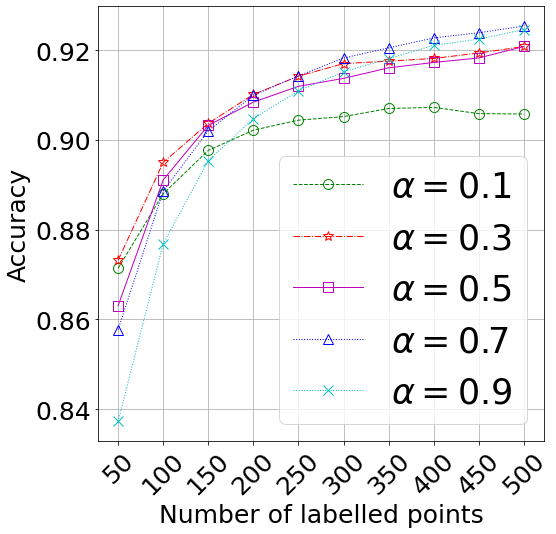

In [4]:
sigma_knn_mean1 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_1_N_100.npy')
sigma_knn_sd1 = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_1_N_100.npy')

sigma_knn_mean3 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_3_N_100.npy')
sigma_knn_sd3 = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_3_N_100.npy')

sigma_knn_mean5 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_5_N_100.npy')
sigma_knn_sd5 = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_5_N_100.npy')

sigma_knn_mean7 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_7_N_100.npy')
sigma_knn_sd7 = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_7_N_100.npy')

sigma_knn_mean9 = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_9_N_100.npy')
sigma_knn_sd9 = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_9_N_100.npy')


number_of_labeled_data = range(50,501,50)
plt.figure(figsize=(8,8))

plt.plot(number_of_labeled_data,sigma_knn_mean1,'go--',linewidth=1, markersize=10, mfc='none') 
plt.plot(number_of_labeled_data,sigma_knn_mean3,'r*-.',linewidth=1, markersize=10, mfc='none')
plt.plot(number_of_labeled_data,sigma_knn_mean5,'ms-',linewidth=1, markersize=10, mfc='none')
plt.plot(number_of_labeled_data,sigma_knn_mean7,'b^:',linewidth=1, markersize=10, mfc='none')
plt.plot(number_of_labeled_data,sigma_knn_mean9,'cx:',linewidth=1, markersize=10, mfc='none')

# plt.fill_between(number_of_labeled_data, (sigma_knn_mean1 - sigma_knn_sd1), (sigma_knn_mean1 + sigma_knn_sd1), alpha=.1, color = 'g')
# plt.fill_between(number_of_labeled_data, (sigma_knn_mean3 - sigma_knn_sd3), (sigma_knn_mean3 + sigma_knn_sd3), alpha=.1, color = 'r')
# plt.fill_between(number_of_labeled_data, (sigma_knn_mean5 - sigma_knn_sd5), (sigma_knn_mean5 + sigma_knn_sd5), alpha=.1, color = 'm')
# plt.fill_between(number_of_labeled_data, (sigma_knn_mean7 - sigma_knn_sd7), (sigma_knn_mean7 + sigma_knn_sd7), alpha=.1, color = 'b')
# plt.fill_between(number_of_labeled_data, (sigma_knn_mean9 - sigma_knn_sd9), (sigma_knn_mean9 + sigma_knn_sd9), alpha=.1, color = 'c')



plt.legend([         
            r'$\alpha = 0.1$',
            r'$\alpha = 0.3$',
            r'$\alpha = 0.5$',
            r'$\alpha = 0.7$',
            r'$\alpha = 0.9$'
           ], loc = 4, fontsize=35)
                 
plt.grid()
plt.xticks(number_of_labeled_data, fontsize = 25, rotation = 45)
plt.yticks(fontsize = 25)
plt.xlabel("Number of labelled points", fontsize = 25)
plt.ylabel("Accuracy", fontsize = 25)
plt.savefig('/home/dsarkar/compute_canada/MNIST/analysis/MNIST10_trained-on-sigma-with-kmeans_comparison_alpha_N_100_test.pdf', bbox_inches = 'tight')

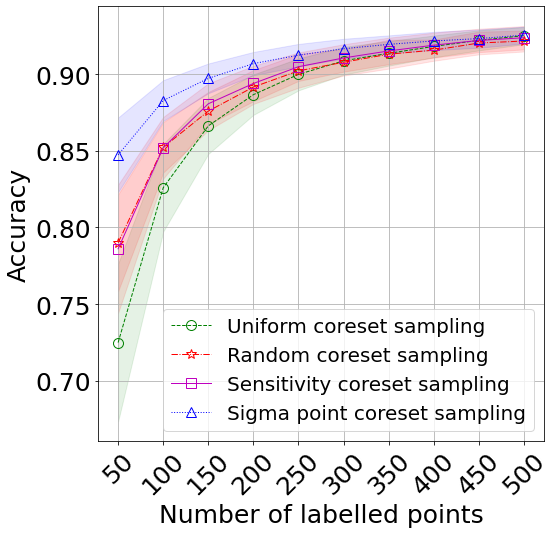

In [8]:
sigma_knn_mean = np.load('/home/dsarkar/compute_canada/MNIST/result/mean_accuracy_MNIST10_sigma_KNN_alpha_0_8_N_100.npy')
sigma_knn_sd = np.load('/home/dsarkar/compute_canada/MNIST/result/sd_accuracy_MNIST10_sigma_KNN_alpha_0_8_N_100.npy')


number_of_labeled_data = range(50,501,50)
plt.figure(figsize=(8,8))

plt.plot(number_of_labeled_data,uniform_ls,'go--',linewidth=1, markersize=10, mfc='none') 
plt.plot(number_of_labeled_data,random_coreset_ls50,'r*-.',linewidth=1, markersize=10, mfc='none')
plt.plot(number_of_labeled_data,sensitivity_ls50,'ms-',linewidth=1, markersize=10, mfc='none')
plt.plot(number_of_labeled_data,sigma_knn_mean,'b^:',linewidth=1, markersize=10, mfc='none')

plt.fill_between(number_of_labeled_data, (uniform_ls - uniform_ls_sd), (uniform_ls + uniform_ls_sd), alpha=.1, color = 'g')
plt.fill_between(number_of_labeled_data, (random_coreset_ls50 - random_coreset_ls50_sd), (random_coreset_ls50 + random_coreset_ls50_sd), alpha=.1, color = 'r')
plt.fill_between(number_of_labeled_data, (sensitivity_ls50 - sensitivity_ls50_sd), (sensitivity_ls50 + sensitivity_ls50_sd), alpha=.1, color = 'r')
plt.fill_between(number_of_labeled_data, (sigma_knn_mean - sigma_knn_sd), (sigma_knn_mean + sigma_knn_sd), alpha=.1, color = 'b')



plt.legend([         
            'Uniform coreset sampling',
            'Random coreset sampling',
            'Sensitivity coreset sampling',
            'Sigma point coreset sampling' 
           ], loc = 4, fontsize=20)
                 
plt.grid()
plt.xticks(number_of_labeled_data, fontsize = 25, rotation = 45)
plt.yticks(fontsize = 25)
plt.xlabel("Number of labelled points", fontsize = 25)
plt.ylabel("Accuracy", fontsize = 25)
plt.savefig('/home/dsarkar/compute_canada/MNIST/analysis/MNIST10_0_8_N_100_trained-on-sigma-with-kmeans_comparison.pdf', bbox_inches = 'tight')